# Section A (Data Exploration and Visualization)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,KFold
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# K-Means
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
# GMM
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import warnings
warnings.filterwarnings('ignore')
RSEED = 10


In [3]:
Aisles = pd.read_csv('aisles.csv')
Departments = pd.read_csv('departments.csv')
Orders = pd.read_csv('orders.csv')
Products = pd.read_csv('products.csv')
orders_products = pd.read_csv('order_products__prior.csv')
target = pd.read_csv('target.csv')
test_train=pd.read_csv('order_products__train_test.csv')
sns.set()

In [4]:
Aisles.head(10)

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies

In [4]:
Departments.head(10)

department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk

In [5]:
Products.head(10)

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   
5           6                                       Dry Nose Oil        11   
6           7                     Pure Coconut Water With Orange        98   
7           8                  Cut Russet Potatoes Steam N' Mash       116   
8           9                  Light Strawberry Blueberry Yogurt       120   
9          10     Sparkling Orange Juice & Prickly Pear Beverage       115   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
5             11  
6              7  
7              1  
8             16  
9              7

In [6]:
Orders.head(10)

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   
5   3367565        1    prior             6          2                  7   
6    550135        1    prior             7          1                  9   
7   3108588        1    prior             8          1                 14   
8   2295261        1    prior             9          1                 16   
9   2550362        1    prior            10          4                  8   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
5                    19.0  
6                    20.0  
7                    14.0  
8                     0.0  
9                    30.0

changing integr value of day week to string 

In [ ]:
for i in range(len(Orders['order_dow'])):
    if(Orders['order_dow'][i]==0):
        Orders['order_dow'][i] = 'Sunday'
    if(Orders['order_dow'][i]==1):
        Orders['order_dow'][i] = 'Monday'
    if(Orders['order_dow'][i]==2):
        Orders['order_dow'][i] = 'Tuesday'
    if(Orders['order_dow'][i]==3):
        Orders['order_dow'][i] = 'Wednesday'
    if(Orders['order_dow'][i]==4):
        Orders['order_dow'][i] = 'Thursday'
    if(Orders['order_dow'][i]==5):
        Orders['order_dow'][i] ='Friday'
    if(Orders['order_dow'][i]==6):
        Orders['order_dow'][i] = 'Saturday'

# Daily orders summary


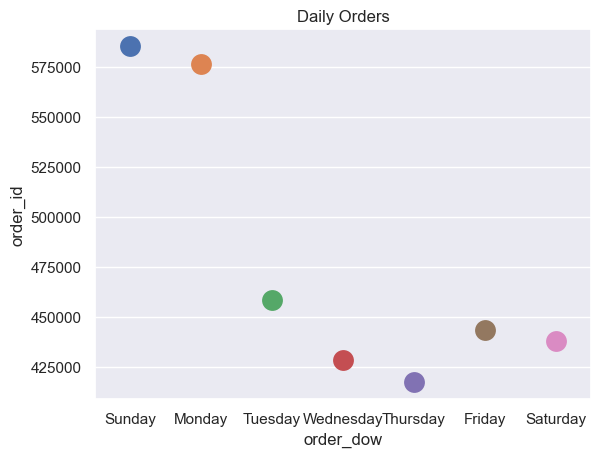

In [8]:

# Define the desired order of the days of the week
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Convert the order_dow column to a categorical variable with the desired order
Orders['order_dow'] = pd.Categorical(Orders['order_dow'], categories=day_order, ordered=True)

# Group the data by order_dow and count the number of orders in each group
orders_group = Orders.groupby(['order_dow']).count()
orders_group.reset_index(inplace=True)

# Create the swarm plot with the categorical x-axis variable
sns.swarmplot(x="order_dow", y="order_id", data=orders_group, dodge=False, size=15).set(title='Daily Orders')
plt.show()


You can learn from this graph that there has been a large  decline in number of orders over the week ,and then  we can see that in the weekend there is a small rise in number of orders. In addition ,  we can inffer that Sunday and Monday are the most days that the uesrs did order  

#  Hourly orders summary


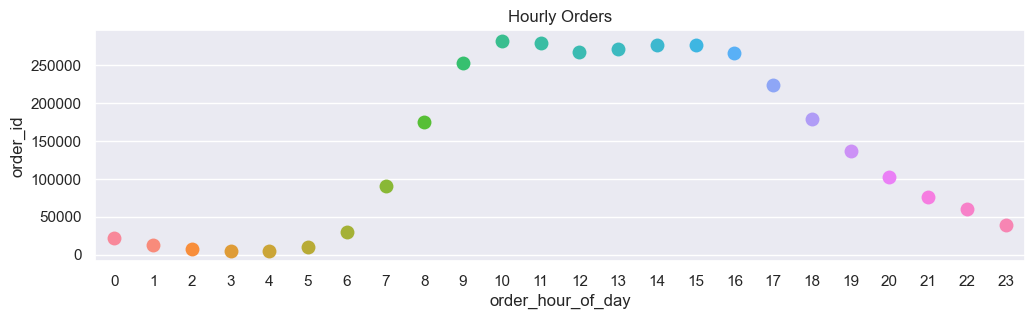

In [9]:
plt.figure(figsize = (12,3))
hourly_order = Orders.groupby(['order_hour_of_day']).count()
hourly_order.reset_index(inplace=True)
sns.swarmplot(x="order_hour_of_day", y="order_id", data=hourly_order, dodge=False, size=10).set(title='Hourly Orders')
plt.show()

# Orders by Hour over Day summary

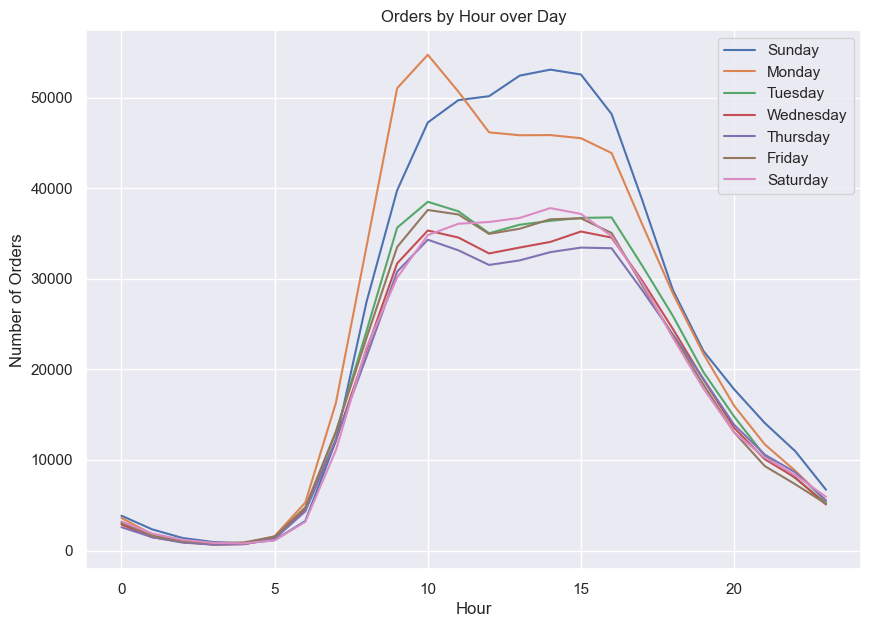

In [10]:

# group orders by day and hour and count the number of orders
orders_by_day_hour = Orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()
# create a pivot table to aggregate orders by hour and day
pivot_table = orders_by_day_hour.pivot(index='order_hour_of_day', columns='order_dow', values='order_id')
# create a line chart
fig, ax = plt.subplots(figsize=(10, 7))
for col in pivot_table.columns:
    ax.plot(pivot_table.index, pivot_table[col], label=col)
# add legend, title and axis labels
ax.legend()
plt.title('Orders by Hour over Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


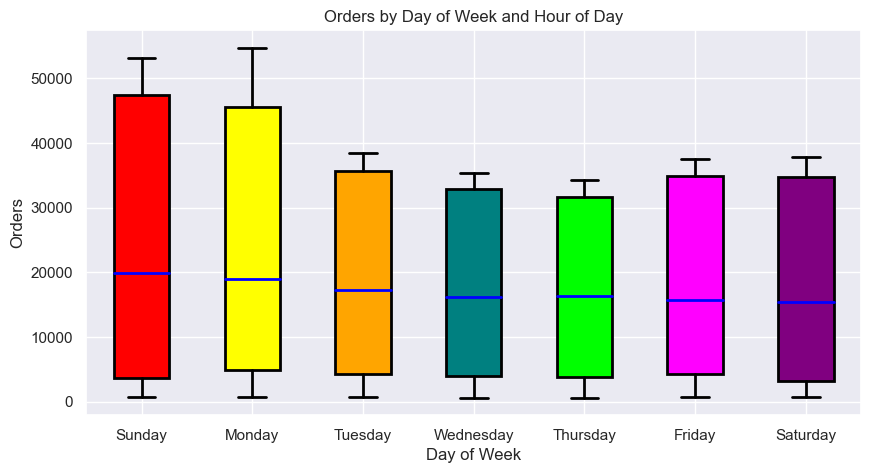

In [11]:
# Group the orders by day of the week and hour of the day
orders_by_day_hour = Orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()

# Pivot the data to create a DataFrame with days of the week as columns
orders_by_day_hour = orders_by_day_hour.pivot(index='order_hour_of_day', columns='order_dow', values='order_id')

# Reorder the columns so that Monday is the first column and Sunday is the last column
orders_by_day_hour = orders_by_day_hour[['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

# Create the box plot
fig, ax = plt.subplots(figsize=(10,5))
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
medianprops = dict(linewidth=2, color='blue')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='black')
colors = ['red', 'yellow', 'orange', 'teal', 'lime', 'magenta', '#800080']

bp = ax.boxplot(orders_by_day_hour.values, patch_artist=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, whiskerprops=whiskerprops)
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i])
    
ax.set_title("Orders by Day of Week and Hour of Day")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Orders")
ax.set_xticklabels([ 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()


# Products_distribution_between_department


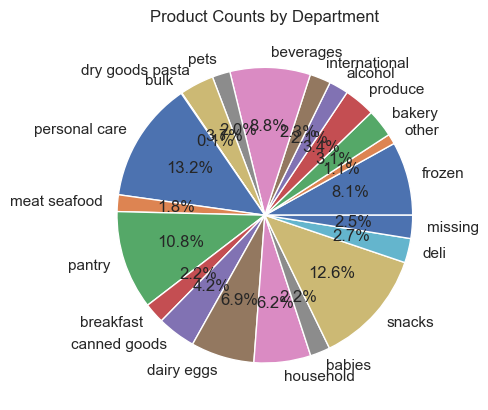

In [12]:
# Group the products by department and count the number of products in each department
products_by_department = Products.groupby('department_id')['product_id'].count()
# Merge the department names onto the product_counts DataFrame
products_by_department = pd.merge(products_by_department, Departments, on='department_id')
# Create a pie chart to visualize the product counts by department using the department names
fig, ax = plt.subplots()
ax.pie(products_by_department['product_id'], labels=products_by_department['department'], autopct='%1.1f%%')
ax.set_title("Product Counts by Department")
plt.show()


# Product Distribution by Department and Aisle Summary 

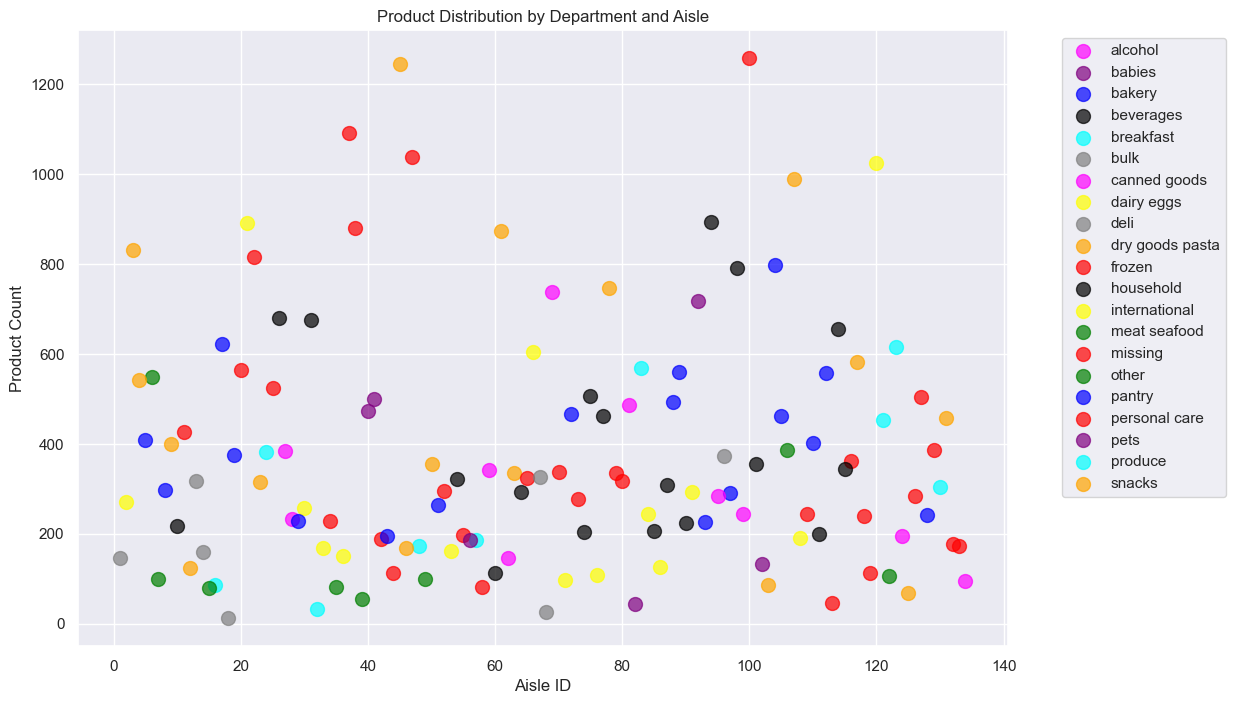

In [13]:
# Group the products by department and aisle
product_counts = Products.groupby(['department_id', 'aisle_id'])['product_id'].count().reset_index()

# Merge the department names into the DataFrame
product_counts = pd.merge(product_counts, Departments, on='department_id')

# Define colors and create a dictionary mapping departments to colors
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'gray']
dep_color_dict = {}
for i, dep in enumerate(product_counts['department'].unique()):
    dep_color_dict[dep] = colors[i%len(colors)]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12,8))
for dep in product_counts['department'].unique():
    dep_data = product_counts[product_counts['department']==dep]
    ax.scatter(dep_data['aisle_id'], dep_data['product_id'], s=100, alpha=0.7, color=dep_color_dict[dep], label=dep)
ax.set_title("Product Distribution by Department and Aisle")
ax.set_xlabel("Aisle ID")
ax.set_ylabel("Product Count")

# Create a legend outside the graph
handles, labels = ax.get_legend_handles_labels()
dep_labels = sorted(list(set(labels)))
dep_handles = [handles[labels.index(dep)] for dep in dep_labels]
ax.legend(dep_handles, dep_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Top 20 products who has been reordered by users


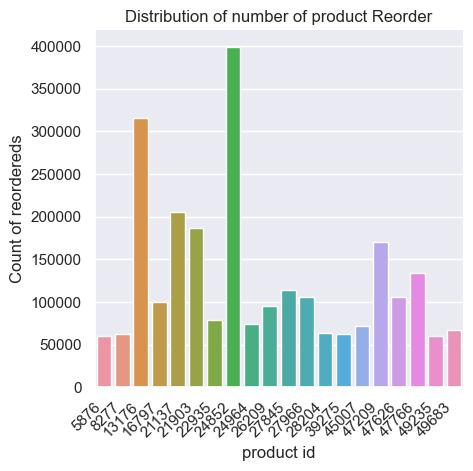

In [14]:
# Group the data by product ID and calculate the sum of reorder counts
grouped = orders_products.groupby('product_id')['reordered'].sum()
df_grouped = grouped.reset_index()
# Create a bar plot
df_top20 = df_grouped.sort_values(by='reordered', ascending=False).head(20)

# Create a bar plot
sns.catplot(x='product_id', y='reordered', kind='bar', data=df_top20)
# Add axis labels and a title
plt.xlabel('product id')
plt.ylabel('Count of reordereds')
plt.title('Distribution of number of product Reorder')
# Display the plot
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.show()

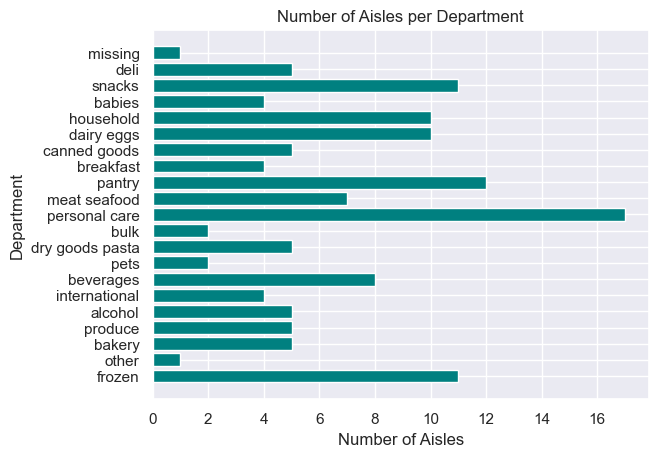

In [15]:
# Group the aisles by department
aisle_counts = Products.groupby('department_id')['aisle_id'].nunique()

# Merge the department names onto the product_counts DataFrame
aisle_counts = pd.merge(aisle_counts, Departments, on='department_id')
# Create the horizontal bar chart
colors = ['teal']
plt.barh(aisle_counts['department'], aisle_counts['aisle_id'],color=colors)
plt.xlabel('Number of Aisles')
plt.ylabel('Department')
plt.title('Number of Aisles per Department')
plt.show()


# Number of Orders per Day for Top 20 Users summary

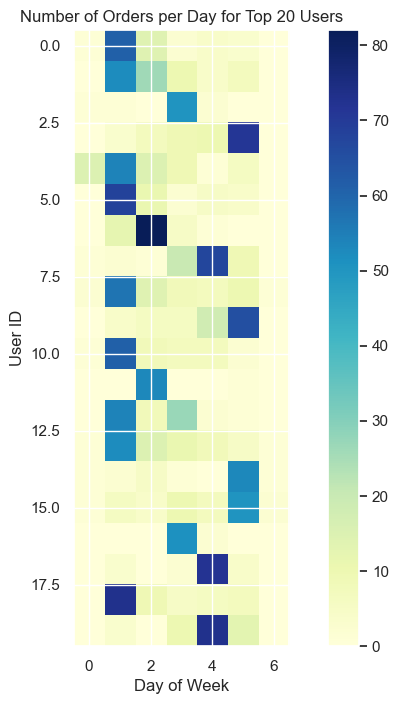

In [16]:
users_orders = Orders.groupby(['user_id', 'order_dow']).count().reset_index()

# Sort the data by the order_number column in descending order
users_orders = users_orders.sort_values('order_number', ascending=False)

# Get the top 20 users with the most orders
top_20_users = users_orders['user_id'].unique()[:20]

# Filter the data to only include the top 20 users
users_orders = users_orders[users_orders['user_id'].isin(top_20_users)]

# Pivot the data to create a matrix of users (rows) by days (columns) with the number of orders as values
users_orders_pivot = users_orders.pivot(index='user_id', columns='order_dow', values='order_number')

# Create a heatmap to visualize the data
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(users_orders_pivot, cmap='YlGnBu')

# Set the axis labels
ax.set_xlabel('Day of Week')
ax.set_ylabel('User ID')

# Add a colorbar to the right of the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title of the plot
ax.set_title('Number of Orders per Day for Top 20 Users')

# Show the plot
plt.show()


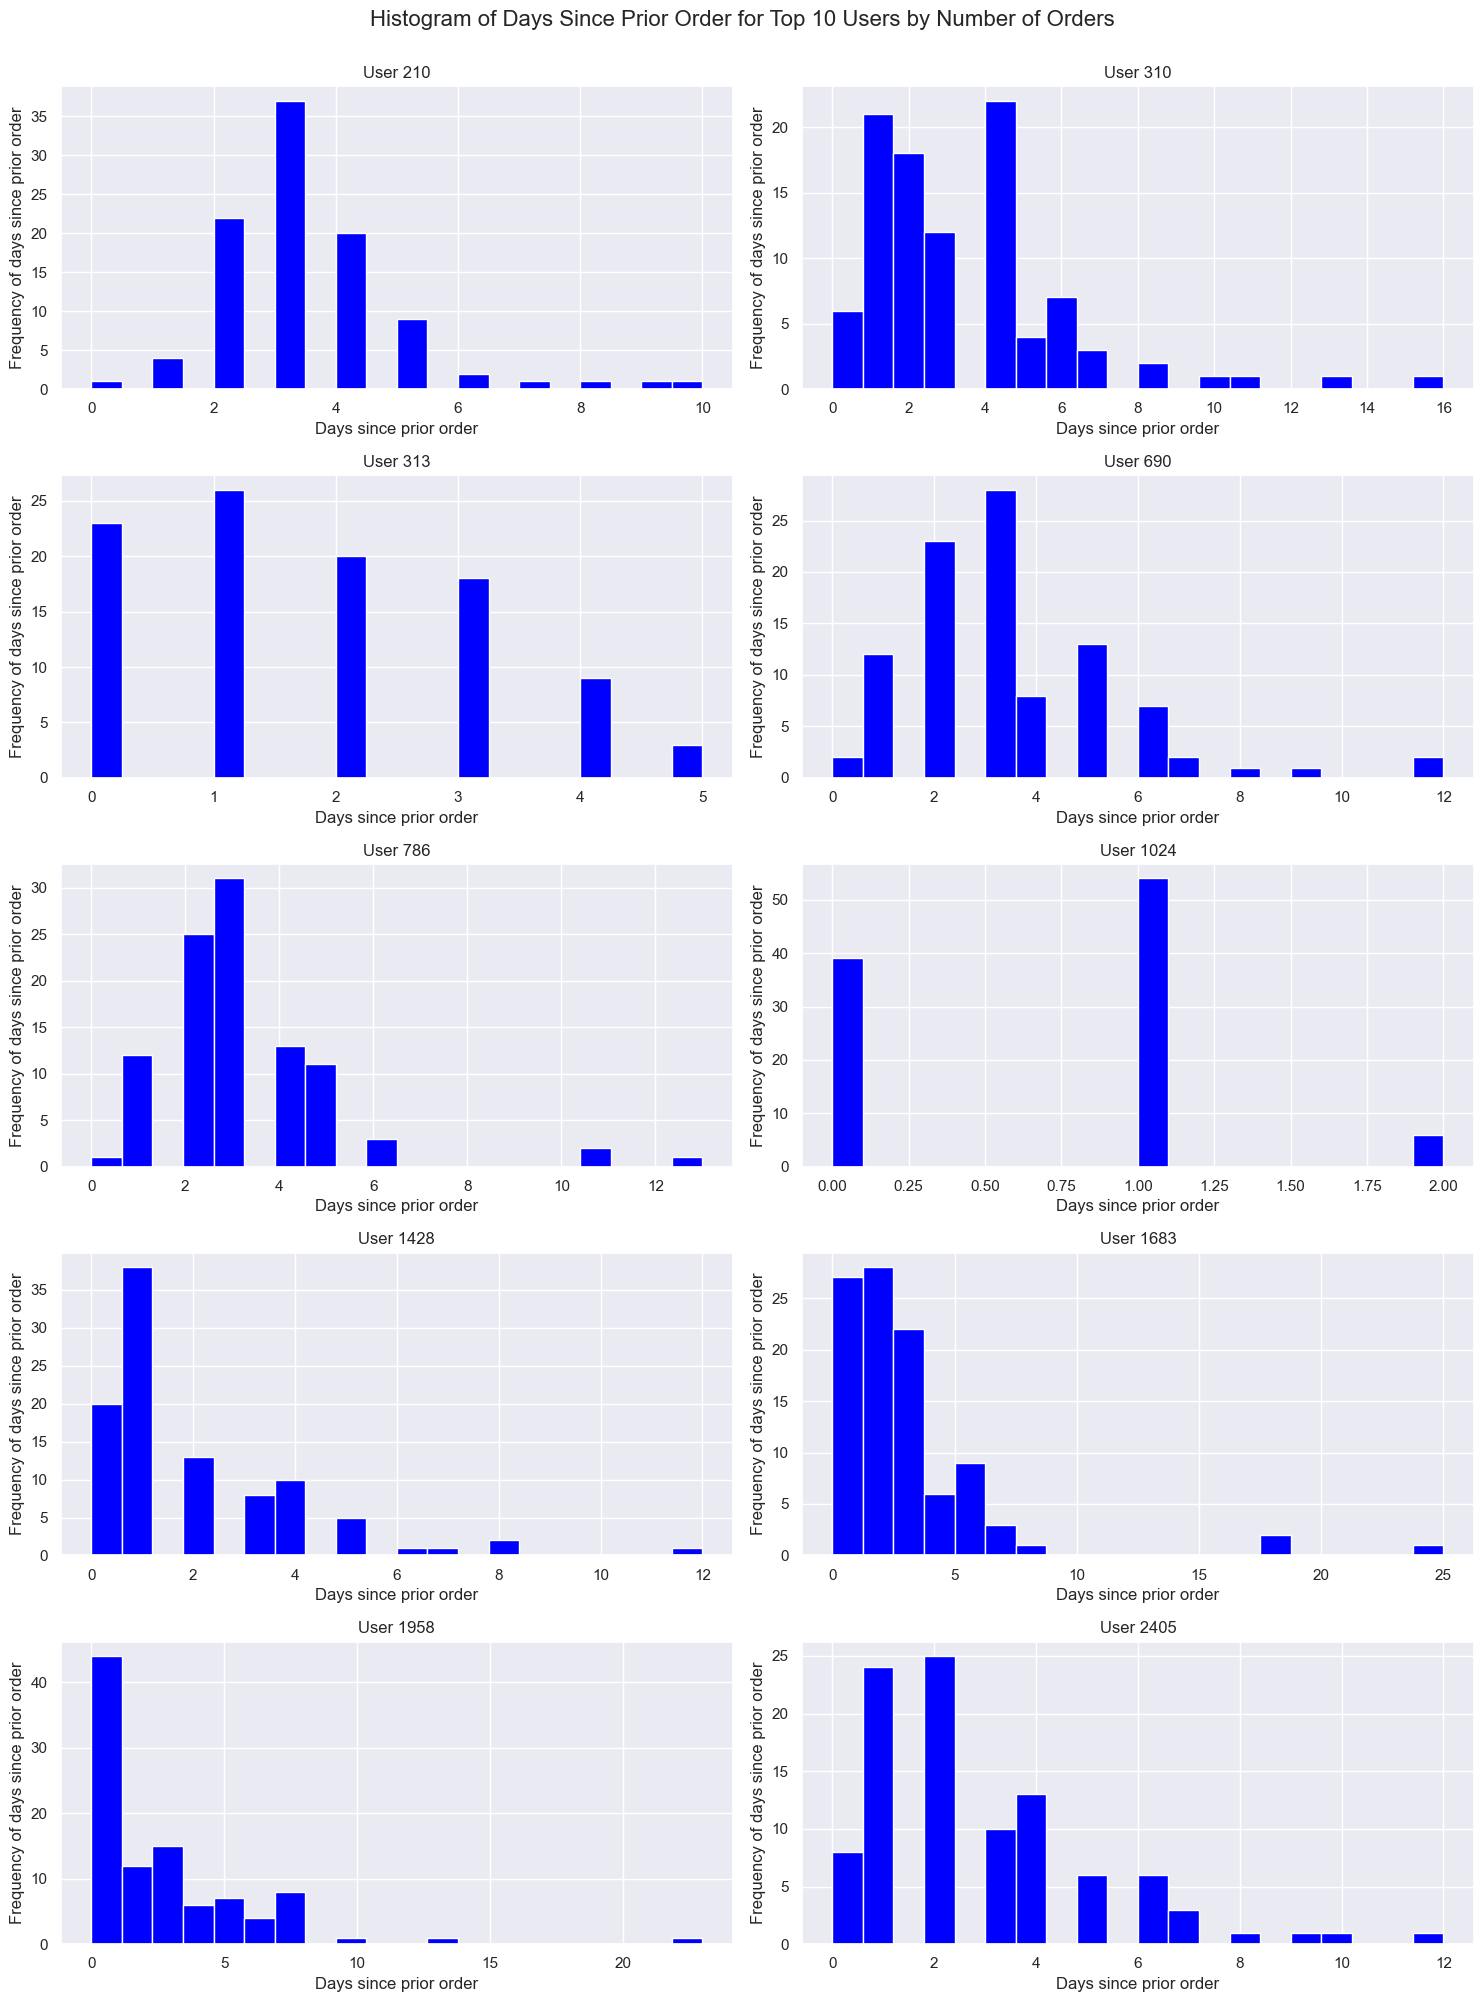

In [17]:
# Get the top 10 users by number of orders
top_users = Orders.groupby('user_id')['order_number'].max().nlargest(10).index

# Filter the data to include only the top 10 users
user_orders = Orders[Orders['user_id'].isin(top_users)].groupby('user_id')['days_since_prior_order'].apply(list).reset_index()

# Create a histogram for each user
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
for i, ax in enumerate(axes.flat):
    if i >= len(user_orders):
        break
    user_id = user_orders.loc[i, 'user_id']
    ax.hist(user_orders.loc[i, 'days_since_prior_order'], bins=20,color='blue')
    ax.set_title(f"User {user_id}")
    ax.set_xlabel('Days since prior order')
    ax.set_ylabel('Frequency of days since prior order')
    plt.suptitle('Histogram of Days Since Prior Order for Top 10 Users by Number of Orders', fontsize=16, y=1)
plt.tight_layout()
plt.show()



# Section B (Data Pre-processing)

### feature 1: Weekday Purchase Probability - This feature calculates the probability of a customer buying a certain product during a specific day of the week (calculate for each product).

In [69]:
# Filter the data to only include 'prior' samples
Orders = Orders[Orders['eval_set'] == 'prior']

In [5]:
allData=pd.DataFrame()
allData = pd.merge(orders_products,Orders, on='order_id',how='inner')

In [70]:
allData_Products=pd.DataFrame()
allData_Products= pd.merge(orders_products,Orders, on='order_id',how='inner')

In [71]:
del Orders

# In the next cells we will deal with the features that relevant to the products and also we will deal with the features that are relevant t customers in order to do clustering once for customers classification and once for products 

In [6]:
# Group the data by product, day of the week
CalcProbabilities = allData.groupby(['user_id','product_id', 'order_dow']).count()['order_id'].reset_index(name='Probabilities')
# Calculate the total number of orders for each product
total_orders = allData['order_id'].nunique()
# Calculate the probability of a customer buying a certain product during a specific day of the week, taking into account whether the product has been reordered before
probabilities = CalcProbabilities['Probabilities'] / total_orders
CalcProbabilities['Probabilities'] = probabilities

In [7]:
propality_dict = CalcProbabilities.set_index('user_id')['Probabilities'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['Probabilities'] = allData['user_id'].map(propality_dict)

In [8]:
del CalcProbabilities ,propality_dict

For products clustering 

In [72]:
# Group the data by product, day of the week
CalcProbabilitiesProduct = allData_Products.groupby(['product_id', 'order_dow']).count()['order_id'].reset_index(name='Probabilities')
# Calculate the total number of orders for each product
total_orders___ = allData_Products['order_id'].nunique()
# Calculate the probability of a customer buying a certain product during a specific day of the week, taking into account whether the product has been reordered before
probabilitiesProduct = CalcProbabilitiesProduct['Probabilities'] / total_orders___
CalcProbabilitiesProduct['Probabilities'] = probabilitiesProduct

In [73]:
propality_dict_products = CalcProbabilitiesProduct.set_index('product_id')['Probabilities'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData_Products['Probabilities'] = allData_Products['product_id'].map(propality_dict_products)

In [74]:
del CalcProbabilitiesProduct,total_orders___,probabilitiesProduct,propality_dict_products,

### feature 2:"Product_Purchase_Frequency" allows us to identify which customers are repeat purchasers of certain products, which can be useful for predicting future purchases and recommending products.

In [10]:
# Group the data by user id and product id, and count the number of orders for each group
Product_Purchase_Frequency = allData.groupby(['user_id', 'product_id']).size().reset_index(name='Product_Purchase_Frequency')

In [11]:
propality_dict = Product_Purchase_Frequency.set_index('user_id')['Product_Purchase_Frequency'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['Product_Purchase_Frequency'] = allData['user_id'].map(propality_dict)

In [12]:
del Product_Purchase_Frequency,propality_dict


for products clustering

In [76]:
# Group the data by product id, and count the number of orders for each group
Product_Purchase_Frequency_2 = allData_Products.groupby(['product_id']).size().reset_index(name='Product_Purchase_Frequency')

In [77]:
propality_dict_2 = Product_Purchase_Frequency_2.set_index('product_id')['Product_Purchase_Frequency'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData_Products['Product_Purchase_Frequency'] = allData_Products['product_id'].map(propality_dict_2)

In [78]:
del Product_Purchase_Frequency_2,propality_dict_2

### feature 3:Days Since Last Order - provides information on the time elapsed since the customer last bought a particular product in its past orders

In [13]:
# Sort orders by user id, product id, and order number
allData.sort_values(by=['user_id', 'product_id', 'order_number'], inplace=True)
# Create new column 'Days Since Last Order'
groupData_Sumdays= allData.groupby(['user_id', 'product_id'])['days_since_prior_order'].cumsum().reset_index(name='Days Since Last Order')
groupData_Sumdays['user_id'] = allData['user_id']  # Add the 'user_id' column to the groupData DataFrame

In [14]:
propality_dict = groupData_Sumdays.set_index('user_id')['Days Since Last Order'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['Days Since Last Order'] = allData['user_id'].map(propality_dict)

In [15]:
del groupData_Sumdays,propality_dict

for products clustering

In [80]:
# Sort orders by user id, product id, and order number
allData_Products.sort_values(by=['product_id', 'order_number'], inplace=True)
# Create new column 'Days Since Last Order'
groupData_Sumdays_2= allData_Products.groupby(['product_id'])['days_since_prior_order'].cumsum().reset_index(name='Days Since Last Order')
groupData_Sumdays_2['product_id'] = allData_Products['product_id']  # Add the 'user_id' column to the groupData DataFrame

In [81]:
propality_dict_3 = groupData_Sumdays_2.set_index('product_id')['Days Since Last Order'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData_Products['Days Since Last Order'] = allData_Products['product_id'].map(propality_dict_3)

In [82]:
del groupData_Sumdays_2,propality_dict_3

### feature 4: Avarage of orders - Can help segment customers based on their order behavior. For example, we can group customers who order frequently together and target them with personalized promotions or incentives to increase their loyalty.

In [16]:
# Group the orders by user ID and count the number of orders
NumOrders = allData.groupby("user_id")['order_id'].count().reset_index(name='AvgOrdersPerUser')
totalOrders=allData['order_id'].nunique()
Avg=NumOrders['AvgOrdersPerUser']/totalOrders
NumOrders['AvgOrdersPerUser']=Avg

In [17]:
propality_dict = NumOrders.set_index('user_id')['AvgOrdersPerUser'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['AvgOrdersPerUser'] = allData['user_id'].map(propality_dict)

In [18]:
del NumOrders,propality_dict

In addition , Predicting customer lifetime value, The average number of orders per customer can help predict the lifetime value of a customer. Customers who order frequently are more likely to be loyal, and therefore have a higher lifetime value to the business. Also we can do discount to these costumers Also can help personalize the shopping experience for each customer. For example, we can recommend products or promotions to customers based on their order history and their average number of orders.

### feature 5: Number of products per order: this feature calculates the average number of products per order. This feature can help the model identify users who tend to buy in bulk or those who only make small purchases.

In [19]:
NumberOfProductPerOrder = allData.groupby(['user_id','order_id'])["product_id"].count().reset_index(name='AvgOfProductsPer Order"s user')
totalProducts=allData['product_id'].nunique()
AvgOfProducts=NumberOfProductPerOrder['AvgOfProductsPer Order"s user']/totalProducts
NumberOfProductPerOrder['AvgOfProductsPer Order"s user']=AvgOfProducts


In [20]:
propality_dict = NumberOfProductPerOrder.set_index('user_id')['AvgOfProductsPer Order"s user'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['AvgOfProductsPer Order"s user'] = allData['user_id'].map(propality_dict)

In [21]:
del NumberOfProductPerOrder,propality_dict

### feature 6: Product  Popularity: This feature would calculate the popularity of each product, based on the number of times it has been purchased. It could help identify popular products and potentially be used to make recommendations to users so  this will help the store a lot and then they will order quantities of this product

In [101]:
# Group the data by product id , and count the number of users for each product
users_Frequency = allData.groupby(['product_id'])['user_id'].count().reset_index(name='NumberOfusersPerProduct')


for products clustering

In [83]:
# Group the data by product id , and count the number of users for each product
Products_Frequency = allData_Products.groupby(['product_id','order_dow'])['order_id'].count().reset_index(name='NumberOfProductperDay')


In [84]:
propality_dict_4 = Products_Frequency.set_index('product_id')['NumberOfProductperDay'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData_Products['NumberOfProductperDay'] = allData_Products['product_id'].map(propality_dict_4)

In [85]:
del Products_Frequency,propality_dict_4

### feature 7: Department  Popularity: This feature would calculate the popularity of each Department, based on the number of times it has been purchased in this department. It could help identify popular department and potentially be used to make recommendations to users

In [18]:
products_department= pd.merge(pd.merge(Departments,Products,on='department_id'),orders_products,on="product_id")
users_department= pd.merge(products_department,Orders,on="order_id")
departments_Frequency = users_department.groupby(['department'])['user_id'].count().reset_index(name='freqPerdepartment')

### feature 8: Favorite product -This feature could be the category of the product that the user has ordered. It could help capture the user's preferences for certain types of products so we can clustering all the users that prefernce product is the same , and users who tend to purchase certain product categories may have different preferences than those who purchase other product categories

In [22]:
# Group the data by user id and product id, and count the number of orders for each group
product_counts = allData.groupby(['user_id', 'product_id']).size().reset_index(name='count')
# Group the data by user id, and find the product with the highest count for each user
favorite_products = product_counts.loc[product_counts.groupby('user_id')['count'].idxmax()]
orders_with_favorite_products=pd.DataFrame()
# Merge the favorite product data with the original orders data
orders_with_favorite_products = allData.merge(favorite_products, on=['user_id', 'product_id'], how='left')
# Group the data by user id and the favorite product, and find the product ID with the highest count
favorite_product_ids = orders_with_favorite_products.groupby(['user_id', 'count'])['product_id'].apply(lambda x: x.value_counts().index[0]).reset_index(name='favorite_product')


In [23]:
propality_dict = favorite_product_ids.set_index('user_id')['favorite_product'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['favorite_product'] = allData['user_id'].map(propality_dict)

In [24]:
del product_counts,favorite_products,orders_with_favorite_products,favorite_product_ids,propality_dict

## feature 9: favorite_days-this feature could be the favorite_days of the  user that has been odered in this day  It could help capture the user's preferences for certain days. If we have the same favorite day for all users then we can summerize that in this day will be overload


In [25]:
# Group the data by user id and product id, and count the number of orders for each group
days_counts = allData.groupby(['user_id', 'order_dow']).size().reset_index(name='count')

# Group the data by user id, and find the product with the highest count for each user
favorite_days = days_counts.loc[days_counts.groupby('user_id')['count'].idxmax()]
orders_with_favorite_days=pd.DataFrame()

# Merge the favorite product data with the original orders data
orders_with_favorite_days = allData.merge(favorite_days, on=['user_id', 'order_dow'], how='inner')

# Group the data by user id and the favorite product, and find the product ID with the highest count
favorite_day_ids = orders_with_favorite_days.groupby(['user_id', 'count'])['order_dow'].apply(lambda x: x.value_counts().index[0]).reset_index(name='favorite_day')

In [26]:
propality_dict = favorite_day_ids.set_index('user_id')['favorite_day'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData['favorite_day'] = allData['user_id'].map(propality_dict)

In [27]:
del days_counts,favorite_days,orders_with_favorite_days,favorite_day_ids,propality_dict

# feature 10: Popularity of certain product for certain department , so by that we can know how much the product is purachasable by the amount of each product . In addition,  if we saw a large amonut of  product we can infer that there are a lot of cusomers that purchase this product so its indicate that this product is very good 

In [86]:
# Group the data by product id , and count the number of users for each product
products_department1=pd.DataFrame()
products_department1= pd.merge(pd.merge(Departments,Products,on='department_id'),allData_Products,on="product_id")
Products_Freq_perDepartment1 = products_department1.groupby(['department_id','product_id'])['order_id'].count().reset_index(name='freqPurchaseProductperDepartment ')


In [87]:
propality_dict_7 = Products_Freq_perDepartment1.set_index('product_id')['freqPurchaseProductperDepartment '].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
allData_Products['freqPurchaseProductperDepartment'] = allData_Products['product_id'].map(propality_dict_7)

In [88]:
del products_department1,Products_Freq_perDepartment1,propality_dict_7

In this section, I apply several pre-processing methods to the data in order to prepare it for the models that I wish to apply in the next section.

First, I drop the 'add_to_cart_order'thats denotes the sequence in which products were added to cart variable because it's it is not relevant for future order of each customer

In [28]:
allData.drop(['eval_set'], axis=1, inplace=True)

In [89]:
# drop irrelevant variables
allData_Products.drop(['eval_set'], axis=1, inplace=True)
allData_Products.drop(['order_id'], axis=1, inplace=True)
allData_Products.drop(['user_id'], axis=1, inplace=True)

Calculate the percent of missing value in each column.

In [18]:
drops = round(Orders.isnull().sum()/Orders.shape[0]*100,2)


<AxesSubplot:>

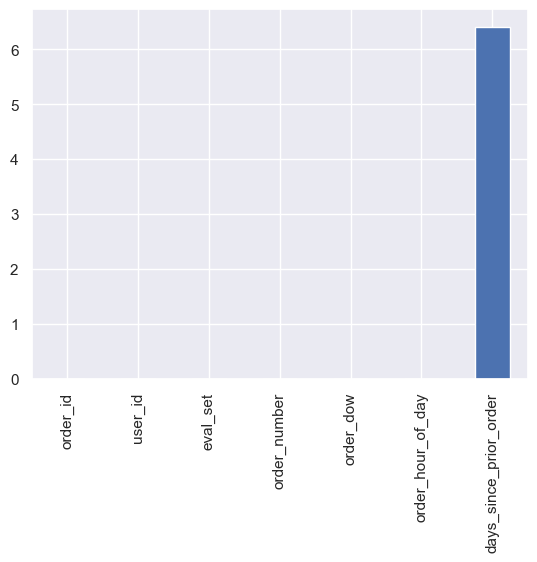

In [19]:
drops.plot.bar()

In [20]:
Orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

we find only one column that have missing values , so we discovered that the missing values are values of fisrt order for each user because that there is no value in it so its will be 0  so we will replace the empty value in 'days_since_prior_order' culomn to 0.

In [29]:
nan_value = float("NaN")

In [30]:
allData['days_since_prior_order'].replace(nan_value, 0, inplace=True)
allData['Days Since Last Order'].replace(nan_value, 0, inplace=True)

In [39]:
allData.isnull().sum()

order_id                         0
product_id                       0
reordered                        0
user_id                          0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order           0
Probabilities                    0
Product_Purchase_Frequency       0
Days Since Last Order            0
AvgOrdersPerUser                 0
AvgOfProductsPer Order"s user    0
favorite_product                 0
favorite_day                     0
dtype: int64

we have one categorical column that have three values which are "test", "train", and "prior" and we need to transform this column to numeric values (e.g. 0, 1, 2) 

In [22]:
# create a label encoder object and fit it to the categorical column
le = LabelEncoder()
Orders['eval_set'] = le.fit_transform(Orders['eval_set'])

# Section C (Future Order Prediction)

For classification algorithms, we are interested in predicting whether a product was in order - the variable 'Was_in_order'.

we merge the orders and orders_products and target files because were allowed to use only proir data 

In [ ]:
data_train = Orders[Orders['eval_set'] == 'train']
data_test = Orders[Orders['eval_set'] == 'test']
train_set = pd.merge(test_train_set,data_train, on='order_id',how='inner')
test_set = pd.merge(test_train_set,data_test, on='order_id',how='inner')

In [ ]:
del data_train,data_test

# we add all features that we've created throughout the prior samples to train_set 

In [ ]:
#add feature 1
propality_dict = allData.set_index('user_id')['Probabilities'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['Probabilities'] = train_set['user_id'].map(propality_dict)
#add feature 2
Product_Purchase_dict = allData.set_index('user_id')['Product_Purchase_Frequency'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['Product_Purchase_Frequency'] = train_set['user_id'].map(Product_Purchase_dict)
#add feature 3
Days_dict = allData.set_index('user_id')['Days Since Last Order'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['Days Since Last Order'] = train_set['user_id'].map(Days_dict)
#add feature 4
avg_dict = allData.set_index('user_id')['AvgOrdersPerUser'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['AvgOrdersPerUser'] = train_set['user_id'].map(avg_dict)
#add feature 5
ordersNum_dict = allData.set_index('user_id')['AvgOfProductsPer Order"s user'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['AvgOfProductsPer Order"s user'] = train_set['user_id'].map(ordersNum_dict)
#add feature 6
numOrdersPerUser_dict = allData.set_index('product_id')['NumberOfusersPerProduct'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['NumberOfusersPerProduct'] = train_set['product_id'].map(numOrdersPerUser_dict)

In [ ]:
#add feature 7
train_set = pd.merge(train_set,Products[['product_id','department_id']],on="product_id",how='inner')
train_set = pd.merge(train_set, Departments, on="department_id", how='inner')
departments_Frequency = allData.set_index('department_id')['freqPerdepartment'].to_dict()
train_set['freqPerdepartment'] = train_set['department_id'].map(departments_Frequency)
#add feature 8
favorite_product_dict = allData.set_index('user_id')['favorite_product'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['favorite_product'] = train_set['user_id'].map(favorite_product_dict)
#add feature 9
favorite_days_dict = allData.set_index('user_id')['favorite_day'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
train_set['favorite_day'] = train_set['user_id'].map(favorite_days_dict)

In [ ]:
del departments_Frequency,favorite_days_dict,numOrdersPerUser_dict,ordersNum_dict,avg_dict,Days_dict,Product_Purchase_dict,propality_dict

In [ ]:
train_set = pd.merge(train_set, target,on=['order_id', 'product_id'], how='outer').fillna({'was_in_order': 0})

In [ ]:
train_set = train_set.drop('eval_set',axis=1)
train_set = train_set.drop('department_id',axis=1)
train_set = train_set.drop('department',axis=1)
train_set = train_set.drop('order_number',axis=1)
train_set = train_set.drop('favorite_day',axis=1)
train_set = train_set.drop('freqPerdepartment',axis=1)
train_set = train_set.drop('add_to_cart_order',axis=1)

In [ ]:
train_set['Days Since Last Order'].fillna(0, inplace=True)
train_set['NumberOfusersPerProduct'].fillna(0, inplace=True)
train_set['Probabilities'].fillna(0, inplace=True)
train_set['Product_Purchase_Frequency'].fillna(0, inplace=True)
train_set['AvgOfProductsPer Order"s user'].fillna(0, inplace=True)
train_set['user_id'].fillna(0, inplace=True)
train_set['days_since_prior_order'].fillna(0, inplace=True)
train_set['AvgOrdersPerUser'].fillna(0, inplace=True)


In [ ]:
train_set['reordered'].fillna(-1, inplace=True)
train_set['order_hour_of_day'].fillna(-1, inplace=True)
train_set['favorite_product'].fillna(-1, inplace=True)
train_set['order_dow'].fillna(-1, inplace=True)

In [ ]:
train_set.isnull().sum()

# we add all the features that we've created through the prior samples to test_set

In [ ]:
#add feature 1
propality_dict = allData.set_index('user_id')['Probabilities'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['Probabilities'] = test_set['user_id'].map(propality_dict)
#add feature 2
Product_Purchase_dict = allData.set_index('user_id')['Product_Purchase_Frequency'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['Product_Purchase_Frequency'] = test_set['user_id'].map(Product_Purchase_dict)
#add feature 3
Days_dict = allData.set_index('user_id')['Days Since Last Order'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['Days Since Last Order'] = test_set['user_id'].map(Days_dict)
#add feature 4
avg_dict = allData.set_index('user_id')['AvgOrdersPerUser'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['AvgOrdersPerUser'] = test_set['user_id'].map(avg_dict)
#add feature 5
ordersNum_dict = allData.set_index('user_id')['AvgOfProductsPer Order"s user'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['AvgOfProductsPer Order"s user'] = test_set['user_id'].map(ordersNum_dict)
#add feature 6
numOrdersPerUser_dict = allData.set_index('product_id')['NumberOfusersPerProduct'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['NumberOfusersPerProduct'] = test_set['product_id'].map(numOrdersPerUser_dict)
#add feature 7
test_set = pd.merge(test_set,Products[['product_id','department_id']],on="product_id",how='inner')
test_set = pd.merge(test_set, Departments, on="department_id", how='inner')
departments_Frequency = allData.set_index('department_id')['freqPerdepartment'].to_dict()
test_set['freqPerdepartment'] = test_set['department_id'].map(departments_Frequency)
#add feature 8
favorite_product_dict = allData.set_index('user_id')['favorite_product'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['favorite_product'] = test_set['user_id'].map(favorite_product_dict)
#add feature 9
favorite_days_dict = allData.set_index('user_id')['favorite_day'].to_dict()
# Add the 'propality' column to the original DataFrame using 'map()'
test_set['favorite_day'] = test_set['user_id'].map(favorite_days_dict)

In [ ]:
del departments_Frequency,favorite_days_dict,numOrdersPerUser_dict,ordersNum_dict,avg_dict,Days_dict,Product_Purchase_dict,propality_dict

In [ ]:
test_set = pd.merge(test_set, target,on=['order_id', 'product_id'], how='outer').fillna({'was_in_order': 0})

we drop features that don't provide relevant information for predicting future orders

In [ ]:
test_set = test_set.drop('eval_set',axis=1)
test_set = test_set.drop('department_id',axis=1)
test_set = test_set.drop('department',axis=1)
test_set = test_set.drop('order_number',axis=1)
test_set = test_set.drop('add_to_cart_order',axis=1)
test_set = test_set.drop('favorite_day',axis=1)
test_set = test_set.drop('freqPerdepartment',axis=1)

In [ ]:
test_set['Days Since Last Order'].fillna(0, inplace=True)
test_set['NumberOfusersPerProduct'].fillna(0, inplace=True)
test_set['days_since_prior_order'].fillna(0, inplace=True)
test_set['AvgOrdersPerUser'].fillna(0, inplace=True)
test_set['Days Since Last Order'].fillna(0, inplace=True)
test_set['NumberOfusersPerProduct'].fillna(0, inplace=True)
test_set['Probabilities'].fillna(0, inplace=True)
test_set['Product_Purchase_Frequency'].fillna(0, inplace=True)
test_set['AvgOfProductsPer Order"s user'].fillna(0, inplace=True)
test_set['user_id'].fillna(0, inplace=True)

In [ ]:
test_set['reordered'].fillna(-1, inplace=True)
test_set['order_hour_of_day'].fillna(-1, inplace=True)
test_set['favorite_product'].fillna(-1, inplace=True)
test_set['order_dow'].fillna(-1, inplace=True)

In [ ]:
test_set.isnull().sum()

In [ ]:
listof = test_set.columns.tolist()
listof

In [ ]:
listof.remove('was_in_order')

now we split the data to train and test:

In [ ]:
y_test = test_set['was_in_order']
y_train = train_set['was_in_order']
X_train = train_set[listof]
X_test = test_set[listof]

In [ ]:
del test_set,train_set,listof

In [ ]:
X_train = X_train.iloc[1380617:1387617]
y_train =y_train.iloc[1380617:1387617]
X_test = X_test.iloc[1380617:1387617]
y_test =y_test.iloc[1380617:1387617]

In [ ]:
results = []
models = []
kfold = KFold() 

In [ ]:
value_counts = pd.DataFrame(y_test).value_counts()

In [ ]:
value_counts1 = pd.DataFrame(y_pred).value_counts()
value_counts1

# KNeighborsRegressor

In [ ]:
# define model
knn = KNeighborsRegressor()

# define parameter grid
parameters_grid = {
    'n_neighbors': [5, 10, 15, 25, 50],
    'weights': ['uniform', 'distance']
}

# define grid search
grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_train, y_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
cv_results = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
models.append('KNeighbors')

In [ ]:
# predict
y_pred = best.predict(X_test)
y_pred = y_pred.astype(int)
# calculate accuracy
acc = round(accuracy_score(y_test, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'KNN Classifier'}, columns={0: 'Accuracy'})
df

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
cmd.plot()
plt.show()

In [ ]:
del best,grid_search,parameters_grid,y_pred,df,cmd,cv_results

# RandomForestClassifier

In [ ]:
# define model
rf = RandomForestClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 4, 6],
    'n_estimators': [20, 50, 80]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_train, y_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
cv_results = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
models.append('RandomForest')

In [ ]:
def get_metrics(y_test, y_pred):
    
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # get confusion matrix
    mat = metrics.confusion_matrix(y_test, y_pred)
    true_neg, false_pos, false_neg, true_pos = mat.ravel()
    
    # calculate sensitivity and specificity
    sensitivity = round(true_pos / np.sum(actual_pos), 3)
    specificity = round(true_neg / np.sum(actual_neg), 3)
    
    return sensitivity, specificity

In [ ]:
# predict
y_pred = best.predict(X_test)

# calculate metrics
acc = round(accuracy_score(y_test, y_pred), 3)
sensitivity, specificity = get_metrics(y_test, y_pred)

# display metrics
rf_df = pd.DataFrame([acc, sensitivity, specificity]).T
rf_df = rf_df.rename(index={0: 'Random Forest Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
rf_df

In [ ]:
# plot confusion metrics
plot_confusion_matrix(best, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
imp = imp[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=15)
plt.show()

# AdaBoostClassifier

In [ ]:
# define model
ab = AdaBoostClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_estimators': [15,30]
}

# define grid search
grid_search = GridSearchCV(estimator=ab, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_train, y_train)


# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
cv_results = cross_val_score(ab, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
models.append('AdaBoost')

In [ ]:
# predict
y_pred = best.predict(X_test)

In [ ]:
# calculate accuracy
acc = round(accuracy_score(y_test, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'AdaBoost Classifier'}, columns={0: 'Accuracy'})
df

In [ ]:
# plot confusion metrics
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
cmd.plot()
plt.title("AdaBoostClassifier Confusion Matrix")
plt.show()

In [ ]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
imp = imp[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=10)
plt.show()

# GradientBoostingRegressor


In [ ]:
# define model
gb = GradientBoostingRegressor(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'learning_rate': [0.5, 1, 1.5, 2],
    'n_estimators': [50, 100, 120, 150, 180, 200]
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

In [ ]:
# fit estimator
grid_search.fit(X_train, y_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
cv_results = cross_val_score(gb, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
models.append('GradientBoosting')

In [ ]:
# predict
y_pred = best.predict(X_test)

# calculate MSE
MSE = round(mean_squared_error(y_test, y_pred), 3)

df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Gradient Boosting Regressor'}, columns={0: 'MSE'})
df

In [ ]:
# Convert continuous predictions to binary predictions
threshold = 0.5
binary_y_pred = (y_pred > threshold).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, binary_y_pred)

# Create the ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
cmd.plot()
plt.show()

In [ ]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')
imp = imp[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(6, 8))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

# compare the models performance and result


In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models)
plt.show()

# Section D (Clustering)

In this section we going to cluster the customers which customers that look smiliar will be in the same cluster and customers that are not similar will be in different clusters 


Before clustering we prepared and putted all the features together which will help us   halp us to know more about costumers and their buying behavior

then  we want to implement the elbow method to help choose the k value for the k means

In [31]:
df_unique = allData.drop_duplicates(subset='user_id')

In [32]:
del allData

In [33]:
df_unique.isnull().sum()

order_id                         0
product_id                       0
add_to_cart_order                0
reordered                        0
user_id                          0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order           0
Probabilities                    0
Product_Purchase_Frequency       0
Days Since Last Order            0
AvgOrdersPerUser                 0
AvgOfProductsPer Order"s user    0
favorite_product                 0
favorite_day                     0
dtype: int64

In [34]:
df_unique.drop(['order_id'], axis=1, inplace=True)

In [35]:
df_unique.drop(['order_dow'], axis=1, inplace=True)
df_unique.drop(['reordered'], axis=1, inplace=True)
df_unique.drop(['favorite_product'], axis=1, inplace=True)
df_unique.drop(['order_hour_of_day'], axis=1, inplace=True)
df_unique.drop(['days_since_prior_order'], axis=1, inplace=True)
df_unique.drop(['Days Since Last Order'], axis=1, inplace=True)
df_unique.drop(['favorite_day'], axis=1, inplace=True)

In [173]:
df_unique.isnull().sum()

product_id                       0
add_to_cart_order                0
user_id                          0
order_number                     0
Probabilities                    0
Product_Purchase_Frequency       0
AvgOrdersPerUser                 0
AvgOfProductsPer Order"s user    0
cluster                          0
dtype: int64

so now let's find the optimal k by the elbow function

In [36]:
def findOptimalK(dataset):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(dataset)
        kmeanModel.fit(dataset)
        distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

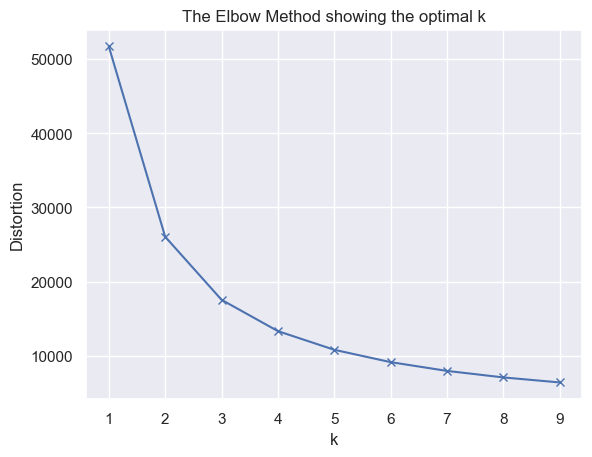

In [37]:
findOptimalK(df_unique)

we will choose k to be 4 (the elbow value)

In [46]:
# define model
k_means = KMeans(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_clusters': [4],
    'init': ['k-means++', 'random'],
    'n_init' : [3,5,8,10],
    'max_iter' : [100, 150, 200]
}

# define grid search
grid_search = GridSearchCV(estimator=k_means, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(df_unique)

# get best estimator
best_km = grid_search.best_estimator_
preditions_best_km = best_km.predict(df_unique)

In [47]:
best_km

KMeans(init='random', max_iter=100, n_clusters=4, n_init=3, random_state=10)

In [48]:
df_unique['cluster'] = preditions_best_km

In [49]:
del k_means , grid_search,best_km

#### To estimate the quality of the clusters and visualize the results, we will use the Silhouette Score as the evaluation metric. 

#### If we want  to estimate the quality of the clusters created by the K-means algorithm,we  are try to evaluating how well the algorithm has grouped the data points into distinct clusters in order to assess the effectiveness of the clustering algorithm and understand the degree to which the clusters capture the underlying structure or patterns in the data.To estimate the quality of the clusters, various evaluation metrics can be used. These metrics provide quantitative measures that assess different aspects of the clustering results. so we choose the Silhouette Score :this metric measures the compactness and separation of the clusters , you will see it in the graph below

In [ ]:

# Calculate the Silhouette Score for each data point
silhouette_values = silhouette_samples(df_unique.iloc[:, :-1], preditions_best_km)

# Calculate the overall Silhouette Score
overall_score = silhouette_score(df_unique.iloc[:, :-1], preditions_best_km)

# Create a bar plot of the Silhouette Scores for each data point
y_lower = 10  # Space between silhouette plots
fig, ax = plt.subplots()
for i in range(len(np.unique(preditions_best_km))):
    cluster_silhouette_values = silhouette_values[preditions_best_km == i]
    cluster_silhouette_values.sort()

    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")
ax.axvline(x=overall_score, color="red", linestyle="--")
ax.set_yticks([])
ax.set_title("Silhouette plot for clusters")
plt.show()

# Let's see each cluster which costumers contains

In [50]:
df_unique['cluster'].unique()

array([0, 2, 3, 1])

In [51]:
cluster = pd.DataFrame()
cluster_0 = {'cluster_number': 0, 'customers': []}
cluster_1 = {'cluster_number': 1, 'customers': []}
cluster_2 = {'cluster_number': 2, 'customers': []}
cluster_3 = {'cluster_number': 3, 'customers': []}

for i in range(len(df_unique['cluster'])):
    cluster_value = df_unique['cluster'].iloc[i]
    user_id = df_unique['user_id'].iloc[i]
    
    if cluster_value == 0:
        cluster_0['customers'].append(user_id)
    elif cluster_value == 1:
        cluster_1['customers'].append(user_id)
    elif cluster_value == 2:
        cluster_2['customers'].append(user_id)
    elif cluster_value == 3:
        cluster_3['customers'].append(user_id)
    else:
        print(f"Ignoring unknown cluster value: {cluster_value}")



In [52]:
cluster = cluster.append(cluster_0, ignore_index=True)
cluster = cluster.append(cluster_1, ignore_index=True)
cluster = cluster.append(cluster_2, ignore_index=True)
cluster = cluster.append(cluster_3, ignore_index=True)
cluster['cluster_number'] = cluster['cluster_number'].astype(int)

In [53]:
del cluster_0,cluster_1,cluster_2,cluster_3

In [54]:
display(cluster)

cluster_number                                          customers
0               0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1               1  [155118, 155119, 155120, 155121, 155122, 15512...
2               2  [52010, 52011, 52012, 52013, 52014, 52015, 520...
3               3  [103754, 103755, 103756, 103757, 103758, 10375...

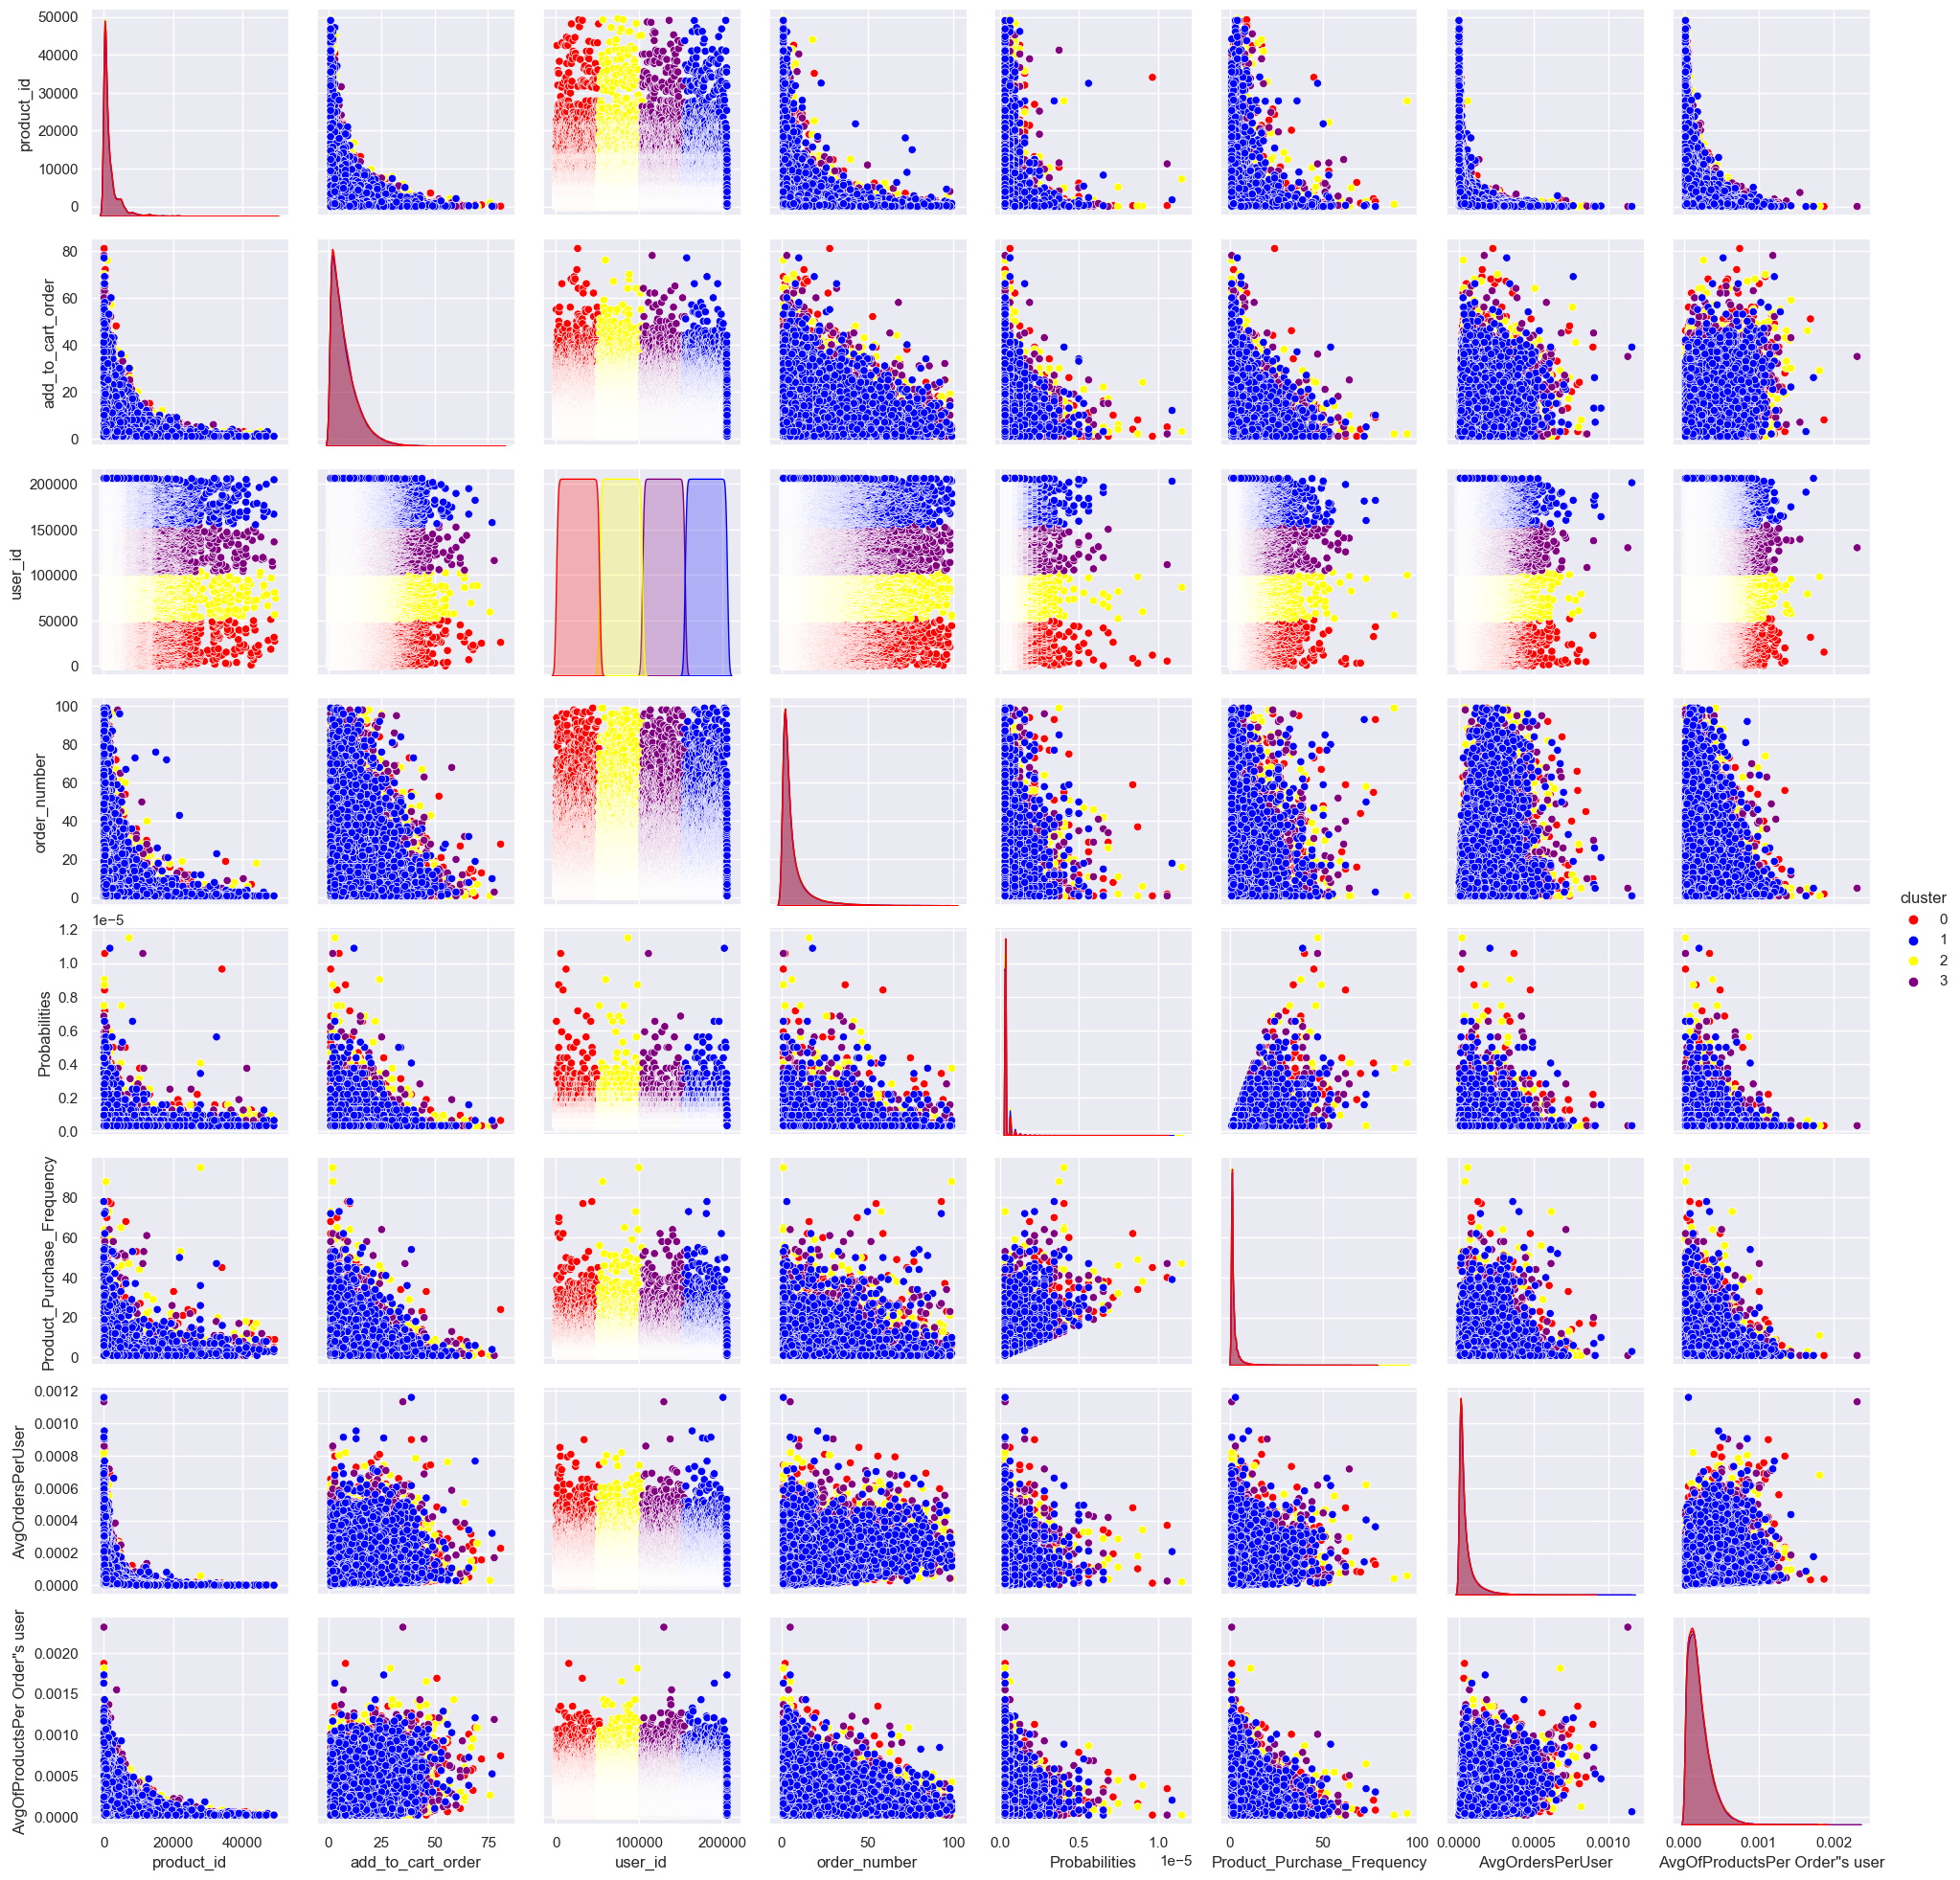

In [55]:
custom_palette = ["red", "blue","yellow","purple"]
sns.pairplot(df_unique, hue='cluster', palette=custom_palette)

על מנת לזהות פיצירים שהם חשובים מדי לסיווג לקוחות נסתכל על הגרפים למעלה ומי שנותן הפרדה ממש טובה יהיו פיצירים חשובים לסייוג

like Product_puchase_frequency with Probabilities and else

ניתן לראות שיש פיצירים שמשפיעים הרבה על הפרדה בין קלסטרים שונים אנו רואים את זה מלמעלה למשל אם נסתכל על שכיחות קניית מוצר מאפשר לנו לזהות אילו לקוחות הם קונים חוזרים של מוצרים מסוימים, מה שיכול להיות שימושי לניבוי רכישות עתידיות ולהמליץ על מוצרים.ובזה ננבה שאותם לקוחות שמתנהגים אותו דבר ודומים יסווגו לאותו מחלקה קלסטר כלומר ככל שהם חולקים אותה כמות ממוצר זה או קונים אותו באותה כמות ככל שהם חולקים אותו בממוצע בכמות דומה ובזה יהיו דומים יותר
וגם יש לנו את הפיצירים ממוצע הזמנה של כל יוזר עם המוצר המועדף לכל לקוח  כפי שאמרנו מקודם זה יכול לעזור ללכוד את העדפות המשתמש עבור סוגים מסוימים של מוצרים, כך שנוכל לרכז את כל המשתמשים שהמוצר המועדף הזה זהה כלומר יהיו באותו קלסטר כפי שרואים למעלה ככל שהיזרז מחלקים אותו מוצר כלומר יש להם אותו מוצר מועדף וגם קונים אותו בכמות זהה בממוצע יוזרז אלו יסווגו לאותו קלסטר , ומשתמשים שנוטים לרכוש קטגוריות מוצרים מסוימות עשויים להיות בעלי העדפות שונות מאלה שרוכשים קטגוריות מוצרים אחרות 

In [ ]:
cluster_customers = {}

# Loop through the dataframe and assign costumers_ids to their respective clusters
for index, row in cluster.iterrows():
    cluster = row['cluster_number']
    costumers_ids = row['customers']
    cluster_customers[cluster] = costumers_ids

# Create a scatter plot for each cluster
for cluster, costumers_ids in cluster_customers.items():
    # Generate random color for each cluster
    color = [np.random.rand(), np.random.rand(), np.random.rand()]

    # Get the products belonging to the current cluster from the main dataframe
    customers = df_unique[df_unique['user_id'].isin(costumers_ids)]

    # Plot the customers of the current cluster
    plt.scatter(
        customers['AvgOfProductsPer Order"s user'],  # Replace with the desired column(s) for the x-axis
        customers['AvgOrdersPerUser'],  # Replace with the desired column(s) for the y-axis
        c=color,
        label=f'Cluster {cluster}'
    )

# Add labels and legend
plt.xlabel('AvgOfProductsPer Order"s user')
plt.ylabel('AvgOrdersPerUser')

# Adjust the x and y axis labels based on the desired columns

plt.legend()

# Show the plot
plt.show()

let's try the gaussian mixture model GMM

In [ ]:
gmm = GaussianMixture(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_components': [3,5,7],
    'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data'],
    'n_init' : [1, 3, 5, 8, 10],
    'max_iter' : [100, 150, 200],
    'tol': [1e-3, 1e-4, 1e-5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}


# define grid search
grid_search = GridSearchCV(estimator=gmm, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(df_unique)

# get best estimator
best_gmm = grid_search.best_estimator_
preditions_best_gmm = best_km.predict(df_unique)
df_unique['cluster'] = preditions_best_gmm
df_unique

In [ ]:
cluster_gmm = pd.DataFrame()
cluster_0 = {'cluster_number': 0, 'customers': []}
cluster_1 = {'cluster_number': 1, 'customers': []}
cluster_2 = {'cluster_number': 2, 'customers': []}
cluster_3 = {'cluster_number': 3, 'customers': []}

for i in range(len(df_unique['cluster'])):
    cluster_value = df_unique['cluster'].iloc[i]
    user_id = df_unique['user_id'].iloc[i]
    
    if cluster_value == 0:
        cluster_0['customers'].append(user_id)
    elif cluster_value == 1:
        cluster_1['customers'].append(user_id)
    elif cluster_value == 2:
        cluster_2['customers'].append(user_id)
    elif cluster_value == 3:
        cluster_3['customers'].append(user_id)
    else:
        print(f"Ignoring unknown cluster value: {cluster_value}")
cluster_gmm = cluster_gmm.append(cluster_0, ignore_index=True)
cluster_gmm = cluster_gmm.append(cluster_1, ignore_index=True)
cluster_gmm = cluster_gmm.append(cluster_2, ignore_index=True)
cluster_gmm = cluster_gmm.append(cluster_3, ignore_index=True)
cluster_gmm['cluster_number'] = cluster_gmm['cluster_number'].astype(int)

In [ ]:
display(cluster_gmm)

In [ ]:
sns.pairplot(df_unique, hue='cluster')

# Clustering products , so in order to do that we will use Kmeans algorithem 

So this allData_Products DataFrame have a features that describe products and features that doesnt descrbe so we will drop features that are not releavant to our clustering  and we have to replace all the calues that are Nan 

In [90]:
allData_Products.head(2)

product_id  add_to_cart_order  reordered  order_number  order_dow  \
87149            1                 30          0             1          1   
811850           1                  4          0             1          2   

        order_hour_of_day  days_since_prior_order  Probabilities  \
87149                  15                     NaN       0.000037   
811850                 14                     NaN       0.000037   

        Product_Purchase_Frequency  Days Since Last Order  \
87149                         1852              1011444.0   
811850                        1852              1011444.0   

        NumberOfProductperDay  freqPurchaseProductperDepartment  
87149                     119                              1852  
811850                    119                              1852

In [91]:
nan_value = float("NaN")
allData_Products['days_since_prior_order'].replace(nan_value, 0, inplace=True)
allData_Products['Days Since Last Order'].replace(nan_value, 0, inplace=True)

In [92]:
df_uniqueProducts = allData_Products.drop_duplicates(subset='product_id')


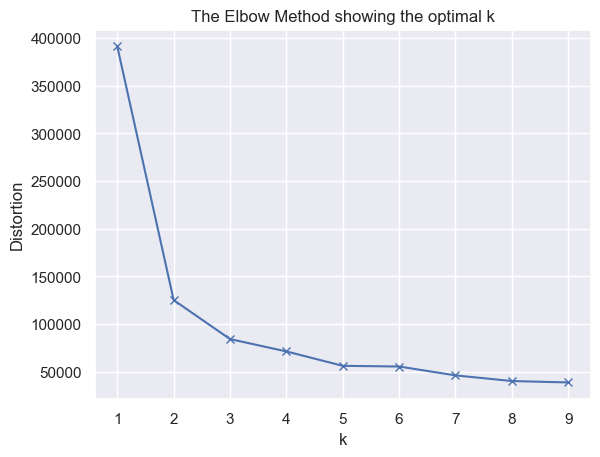

In [93]:
findOptimalK(df_uniqueProducts)

we will choose k to be 3 (the elbow value)


In [95]:
# define model
k_means = KMeans(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_clusters': [3],
    'init': ['k-means++', 'random'],
    'n_init' : [3,5,8,10],
    'max_iter' : [100, 150, 200]
}
# define grid search
grid_search = GridSearchCV(estimator=k_means, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(df_uniqueProducts)

# get best estimator
best_km = grid_search.best_estimator_
preditions_best_km = best_km.predict(df_uniqueProducts)

In [96]:
best_km

KMeans(max_iter=100, n_clusters=3, n_init=8, random_state=10)

In [97]:
df_uniqueProducts['cluster'] = preditions_best_km

In [99]:
df_uniqueProducts['cluster'].unique()

array([1, 2, 0])

In [98]:
df_uniqueProducts.isnull().sum()

product_id                          0
add_to_cart_order                   0
reordered                           0
order_number                        0
order_dow                           0
order_hour_of_day                   0
days_since_prior_order              0
Probabilities                       0
Product_Purchase_Frequency          0
Days Since Last Order               0
NumberOfProductperDay               0
freqPurchaseProductperDepartment    0
cluster                             0
dtype: int64

In [100]:
clusterProducts = pd.DataFrame()
cluster_0 = {'cluster_number': 0, 'products': []}
cluster_1 = {'cluster_number': 1, 'products': []}
cluster_2 = {'cluster_number': 2, 'products': []}

for i in range(len(df_uniqueProducts['cluster'])):
    cluster_value = df_uniqueProducts['cluster'].iloc[i]
    product_id = df_uniqueProducts['product_id'].iloc[i]
    
    if cluster_value == 0:
        cluster_0['products'].append(product_id)
    elif cluster_value == 1:
        cluster_1['products'].append(product_id)
    elif cluster_value == 2:
        cluster_2['products'].append(product_id)
    else:
        print(f"Ignoring unknown cluster value: {cluster_value}")



In [101]:
clusterProducts = clusterProducts.append(cluster_0, ignore_index=True)
clusterProducts = clusterProducts.append(cluster_1, ignore_index=True)
clusterProducts = clusterProducts.append(cluster_2, ignore_index=True)
clusterProducts['cluster_number'] = clusterProducts['cluster_number'].astype(int)

cluster_number                                           products
0               0  [13, 24, 31, 35, 36, 44, 61, 63, 66, 80, 81, 9...
1               1  [1, 3, 9, 10, 23, 25, 28, 29, 34, 37, 41, 42, ...
2               2  [2, 4, 5, 6, 7, 8, 11, 12, 14, 15, 16, 17, 18,...

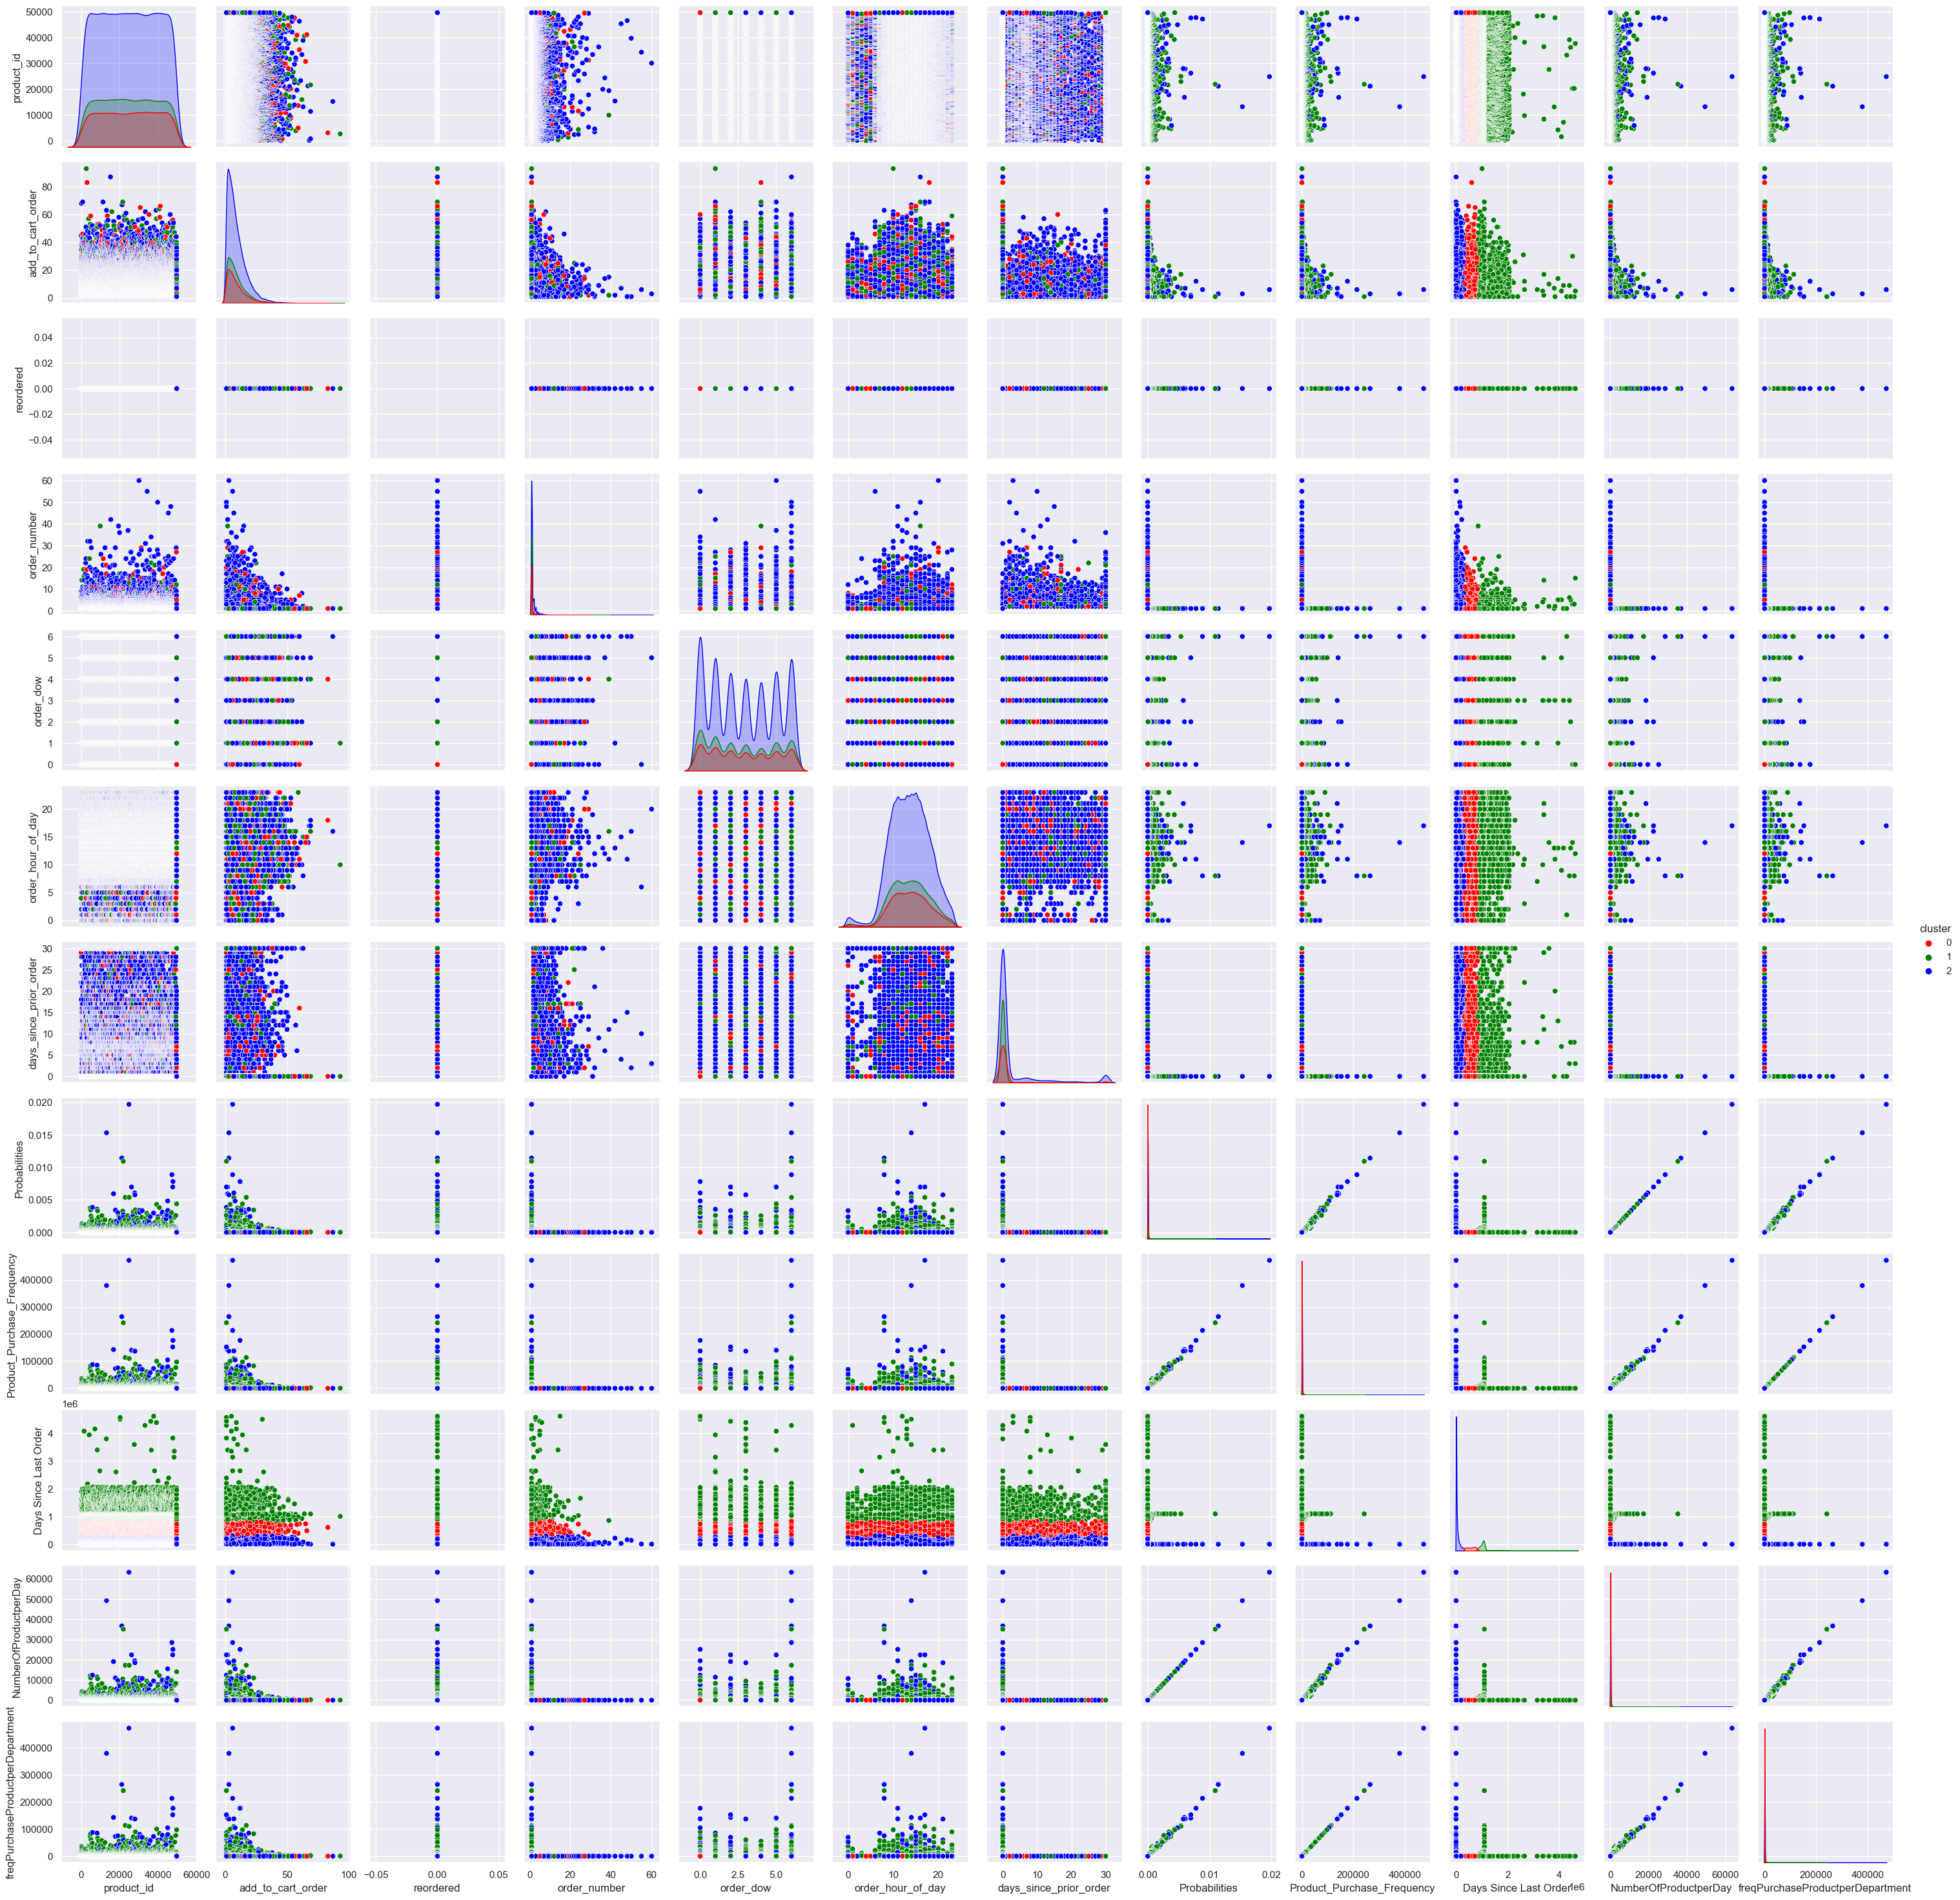

In [102]:
display(clusterProducts)
custom_palette = ["red", "green", "blue"]
sns.pairplot(df_uniqueProducts, hue='cluster',palette=custom_palette)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


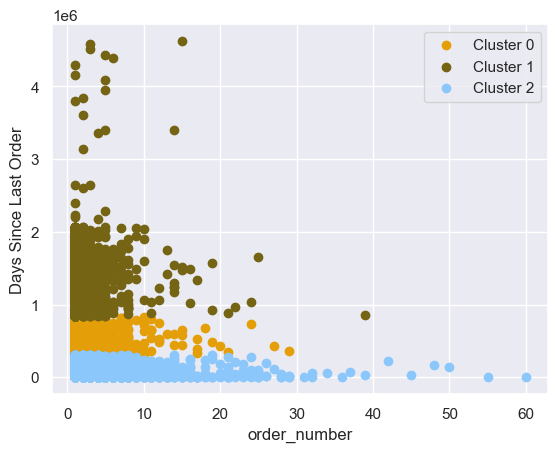

In [103]:

# Assuming you have merged the clusters into a single dataframe called clusterProducts
# The dataframe should have the following columns: 'cluster_number', 'products', and additional columns you mentioned

# Create a dictionary to store product_ids for each cluster
cluster_products = {}

# Loop through the dataframe and assign product_ids to their respective clusters
for index, row in clusterProducts.iterrows():
    cluster = row['cluster_number']
    product_ids = row['products']
    cluster_products[cluster] = product_ids

# Create a scatter plot for each cluster
for cluster, product_ids in cluster_products.items():
    # Generate random color for each cluster
    color = [np.random.rand(), np.random.rand(), np.random.rand()]

    # Get the products belonging to the current cluster from the main dataframe
    products = df_uniqueProducts[df_uniqueProducts['product_id'].isin(product_ids)]

    # Plot the products of the current cluster
    plt.scatter(
        products['order_number'],  # Replace with the desired column(s) for the x-axis
        products['Days Since Last Order'],  # Replace with the desired column(s) for the y-axis
        c=color,
        label=f'Cluster {cluster}'
    )

# Add labels and legend
plt.xlabel('order_number')
plt.ylabel('Days Since Last Order')

# Adjust the x and y axis labels based on the desired columns

plt.legend()

# Show the plot
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


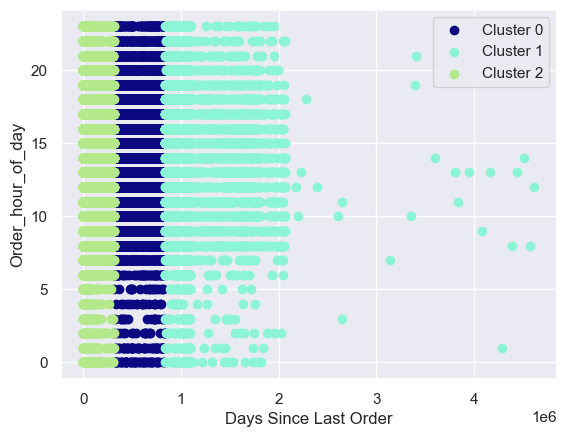

In [105]:
cluster_products = {}

# Loop through the dataframe and assign product_ids to their respective clusters
for index, row in clusterProducts.iterrows():
    cluster = row['cluster_number']
    product_ids = row['products']
    cluster_products[cluster] = product_ids

# Create a scatter plot for each cluster
for cluster, product_ids in cluster_products.items():
    # Generate random color for each cluster
    color = [np.random.rand(), np.random.rand(), np.random.rand()]

    # Get the products belonging to the current cluster from the main dataframe
    products = df_uniqueProducts[df_uniqueProducts['product_id'].isin(product_ids)]

    # Plot the products of the current cluster
    plt.scatter(
        products['Days Since Last Order'],  # Replace with the desired column(s) for the x-axis
        products['order_hour_of_day'],  # Replace with the desired column(s) for the y-axis
        c=color,
        label=f'Cluster {cluster}'
    )

# Add labels and legend
plt.xlabel('Days Since Last Order')
plt.ylabel('Order_hour_of_day')

# Adjust the x and y axis labels based on the desired columns

plt.legend()

# Show the plot
plt.show()

# אנו רואים פה בצורה ברורה שאלו פיצירים שמפרידים טוב את הקלסטרים 

let's try the gaussian mixture model GMM

In [ ]:
gmm = GaussianMixture(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_components': [3],
    'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data'],
    'n_init' : [1, 3, 5, 8, 10],
    'max_iter' : [100, 150, 200],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}


# define grid search
grid_search = GridSearchCV(estimator=gmm, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(df_uniqueProducts)

# get best estimator
best_gmm = grid_search.best_estimator_
preditions_best_gmm = best_km.predict(df_uniqueProducts)
df_uniqueProducts['cluster'] = preditions_best_gmm
df_uniqueProducts

In [ ]:
del gmm,grid_search,best_gmm,preditions_best_gmm

In [ ]:
cluster_Products_gmm = pd.DataFrame()
cluster_0 = {'cluster_number': 0, 'products': []}
cluster_1 = {'cluster_number': 1, 'products': []}
cluster_2 = {'cluster_number': 2, 'products': []}

for i in range(len(df_uniqueProducts['cluster'])):
    cluster_value = df_uniqueProducts['cluster'].iloc[i]
    product_id = df_uniqueProducts['product_id'].iloc[i]
    
    if cluster_value == 0:
        cluster_0['products'].append(product_id)
    elif cluster_value == 1:
        cluster_1['products'].append(product_id)
    elif cluster_value == 2:
        cluster_2['products'].append(product_id)
    else:
        print(f"Ignoring unknown cluster value: {cluster_value}")

cluster_Products_gmm = cluster_Products_gmm.append(cluster_0, ignore_index=True)
cluster_Products_gmm = cluster_Products_gmm.append(cluster_1, ignore_index=True)
cluster_Products_gmm = cluster_Products_gmm.append(cluster_2, ignore_index=True)
cluster_Products_gmm['cluster_number'] = cluster_Products_gmm['cluster_number'].astype(int)

In [ ]:
display(cluster_gmm)
custom_palette = ["red", "green", "blue"]
sns.pairplot(df_uniqueProducts, hue='cluster',palette=custom_palette)


# Section E (Clustering and Dimensions Reduction - Bonus) 

df_unique is the data that contains all the customers

In [56]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_unique)  # 'data' represents your customer's data frame

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(scaled_data.T)

# Step 4: Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Select the principal components
explained_variance = eigenvalues / np.sum(eigenvalues)  # Calculate explained variance ratio
cumulative_variance = np.cumsum(explained_variance)
k = np.argmax(cumulative_variance >= 0.8) + 1  # Select the number of components explaining 80% of variance
selected_eigenvectors = eigenvectors[:, :k]

# Step 6: Project the data
reduced_data = np.dot(scaled_data, selected_eigenvectors)

# Print the explained variance ratio for each selected component
for i in range(k):
    print(f"Explained Variance of Component {i+1}: {explained_variance[i]}")

# Print the cumulative explained variance
print("Cumulative Explained Variance:", cumulative_variance[k-1])

# The reduced_data variable now contains the customer data with reduced dimensions


Explained Variance of Component 1: 0.2502042697708284
Explained Variance of Component 2: 0.17214275138747576
Explained Variance of Component 3: 0.1548607709021336
Explained Variance of Component 4: 0.12268401325127933
Explained Variance of Component 5: 0.08821558856476558
Explained Variance of Component 6: 0.040102656482551825
Cumulative Explained Variance: 0.8282100503590345


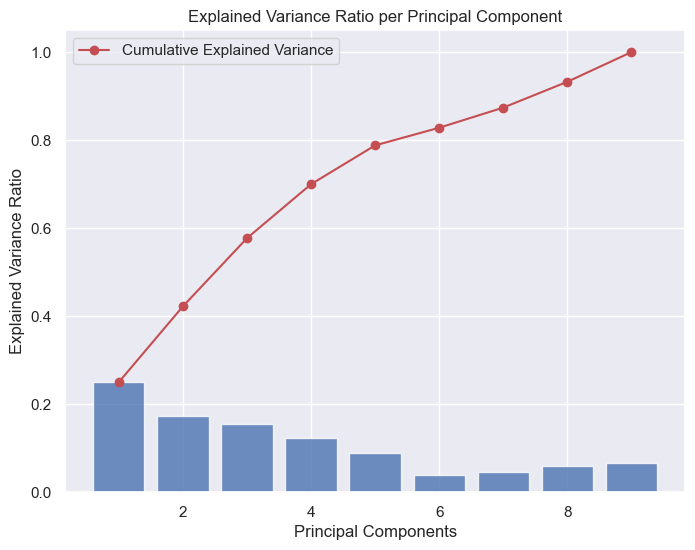


Principal Component 1:
Top Features: Index(['AvgOrdersPerUser', 'add_to_cart_order',
       'AvgOfProductsPer Order"s user', 'order_number',
       'Product_Purchase_Frequency'],
      dtype='object')
Component Values: [-0.53450494 -0.38039466 -0.37394862 -0.37116492 -0.33840229]

Principal Component 2:
Top Features: Index(['Probabilities', 'Product_Purchase_Frequency',
       'AvgOfProductsPer Order"s user', 'add_to_cart_order', 'product_id'],
      dtype='object')
Component Values: [-0.56123943 -0.55378725  0.39274264  0.35984665 -0.2848369 ]

Principal Component 3:
Top Features: Index(['cluster', 'user_id', 'AvgOfProductsPer Order"s user',
       'add_to_cart_order', 'Probabilities'],
      dtype='object')
Component Values: [ 0.70703212  0.70701739  0.00981809  0.00799718 -0.00653669]

Principal Component 4:
Top Features: Index(['order_number', 'AvgOfProductsPer Order"s user', 'add_to_cart_order',
       'Probabilities', 'AvgOrdersPerUser'],
      dtype='object')
Component Values: 

In [57]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'r-o', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.legend()
plt.show()

# Identify features strongly represented in each principal component
n_features = df_unique.shape[1]  # Number of original features

for i in range(k):
    component = selected_eigenvectors[:, i]
    component_abs = np.abs(component)
    top_features_indices = np.argsort(component_abs)[::-1][:5]  # Select top 5 features with highest absolute component values
    top_features = df_unique.columns[top_features_indices]

    print(f"\nPrincipal Component {i+1}:")
    print(f"Top Features: {top_features}")
    print(f"Component Values: {component[top_features_indices]}")

# The reduced_data variable now contains the customer data with reduced dimensions


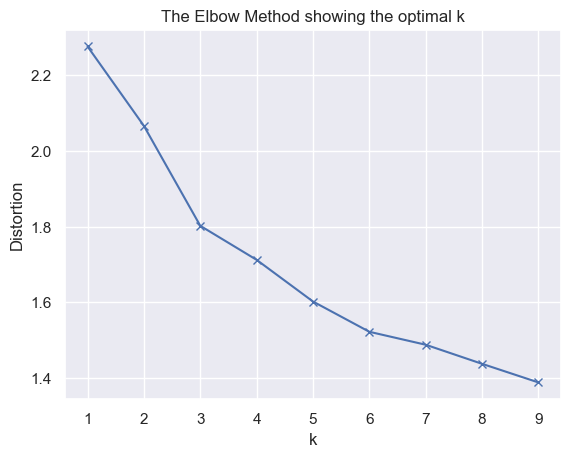

In [58]:
# Perform clustering on the reduced data
findOptimalK(reduced_data)  # Call findOptimalK function to find the optimal number of clusters

In [64]:
# define model
kmeans = KMeans(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_clusters': [5],
    'init': ['k-means++', 'random'],
    'n_init' : [3,5,8,10],
    'max_iter' : [100, 150, 200]
}

# define grid search
grid_search = GridSearchCV(estimator=kmeans, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(reduced_data)

# get best estimator
best_km = grid_search.best_estimator_
preditions_best_km_PCA = best_km.predict(reduced_data)


In [65]:
del kmeans,grid_search,best_km

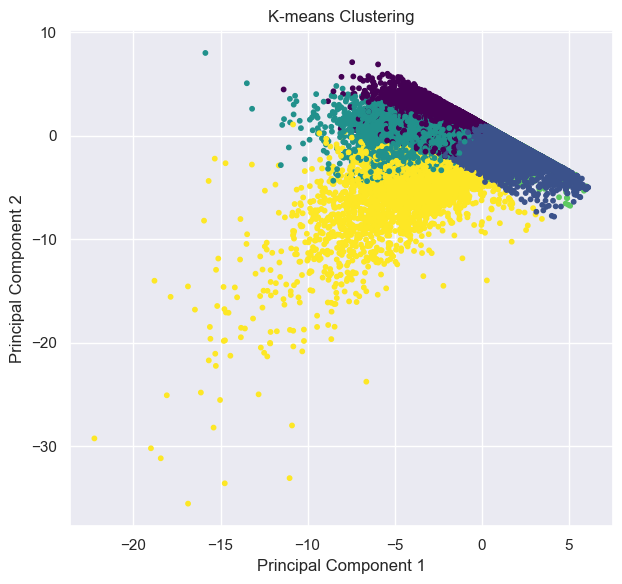

In [66]:
# Visualize the clustering results
plt.figure(figsize=(12, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=preditions_best_km_PCA, cmap='viridis',s=10)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [67]:
df_uniquetemp=np.array(df_unique)
df_uniquetemp

array([[1.96000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        1.83521967e-05, 8.05201602e-05, 0.00000000e+00],
       [2.30000000e+01, 1.20000000e+01, 2.00000000e+00, ...,
        6.06555654e-05, 1.81170361e-04, 0.00000000e+00],
       [2.48000000e+02, 3.00000000e+00, 3.00000000e+00, ...,
        2.73727680e-05, 1.61040320e-04, 0.00000000e+00],
       ...,
       [4.81000000e+02, 1.90000000e+01, 2.06207000e+05, ...,
        6.93650824e-05, 2.41560481e-04, 1.00000000e+00],
       [9.50000000e+01, 1.00000000e+01, 2.06208000e+05, ...,
        2.10583681e-04, 2.41560481e-04, 1.00000000e+00],
       [7.55000000e+02, 3.00000000e+00, 2.06209000e+05, ...,
        4.01259894e-05, 4.02600801e-05, 1.00000000e+00]])

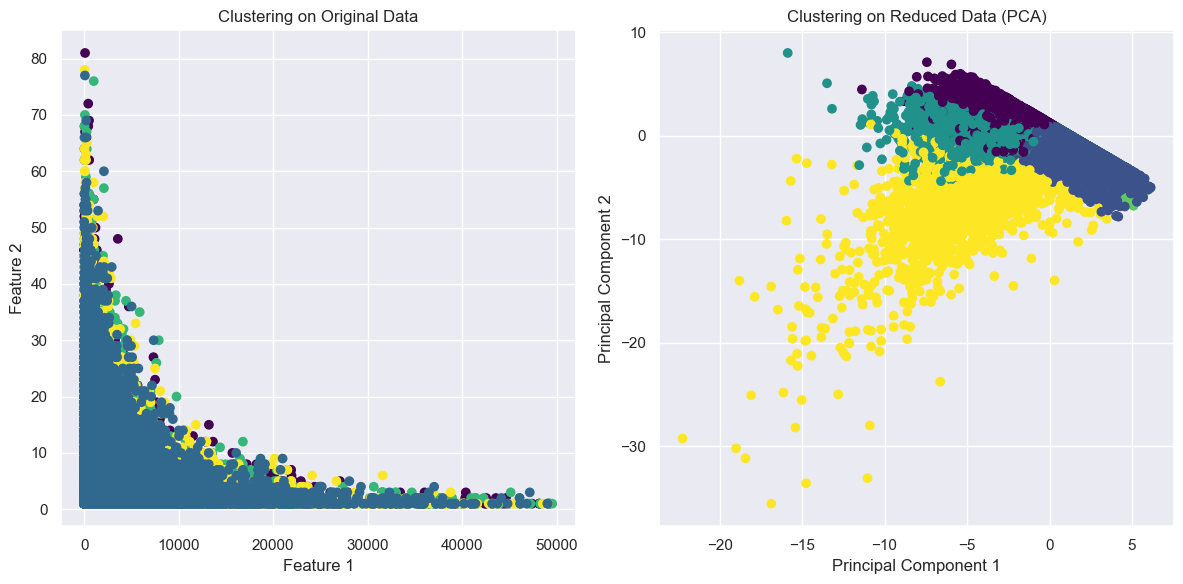

In [68]:
# Visualize the clustering results
plt.figure(figsize=(12, 6))

# Clustering on original data
plt.subplot(1, 2, 1)
plt.scatter(df_uniquetemp[:, 0], df_uniquetemp[:, 1], c=preditions_best_km, cmap='viridis')
plt.title('Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Clustering on reduced data
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=preditions_best_km_PCA, cmap='viridis')
plt.title('Clustering on Reduced Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


# section F - Chi-Square test: 

This test helps us determine whether the " Reordered" feature should be 
selected as a predictor for model training.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(X_train['reordered'], y_train)

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Compare p-value with the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Reordered and Was_In_Order.")
else:
    print("accept the null hypothesis. There is not enough evidence to conclude a significant relationship.")


In the context of the Chi-Square test performed on the "Reordered" feature and the "Was_In_Order" label, accepting the null hypothesis suggests that these two variables are independent of each other. It implies that the occurrence of the "Reordered" feature does not have a significant influence on the binary label "Was_In_Order".